# Resume Classification

### Business objective- The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention Sample Data Set Details: Resumes and financial documents

In [4]:
# after every installation of libraries restart the kernel
#!pip install -U spacy
#! pip install gensim
#!pip install --upgrade thinc pyresparser
#! pip install sumy
#! pip install transformers
#! pip install torch torchvision torchaudio
#! pip install sentencepiece
#! pip install keybert
#!pip install pyresparser
#! pip install -U spacy
#! python -m spacy download en_core_web_lg
#!pip install jsonlines
#!pip install tika
#! pip install -U pip setuptools wheel
#! pip install spacy-transformers
#! python -m spacy download en_core_web_trf
#!pip install textract
#!pip install docx
#! pip install python-docx
#! pip install pyPDF2
#! pip install spacy
#! pip install wordcloud


In [5]:
#configuration to mention for the keybert
%config Completer.use_jedi=False

In [2]:
#importing libraries 
import os,re
import numpy as np
import textract
from docx import document
import os
from PyPDF2 import PdfReader
from docx import Document
import pandas as pd
import docx2txt
import PyPDF2
import warnings
warnings.filterwarnings('ignore')
#setting the dataframe with max width
pd.set_option('max_colwidth', 800)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
from nltk import tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
my_stop_words = set(stopwords.words("english"))
import sys
np.set_printoptions(threshold=10)
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pickle
from pyresparser import ResumeParser
from spacy.matcher import Matcher
import gensim
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from transformers import TFT5ForConditionalGeneration, T5Tokenizer
import warnings
warnings.filterwarnings("ignore")
from keybert import KeyBERT
from sklearn.metrics.pairwise import cosine_similarity
import jsonlines
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

## Data Extraction

## React Develeopers Resume extraction

In [7]:
#checking with our directory
os.listdir("C:/Users/Adith/Desktop/Data_Science_Excel R/Projects_Datascience/resume_classification/Resumes/React_develeopers")

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologie

In [8]:
#defining a function to extract the resumes from the directory
#this code cannot read if antiword is not installed in your path of environment variable
def get_resume_text(filepath, file):
    if file.endswith('.docx'):
        file_path = os.path.join(filepath, file)
        text = docx2txt.process(file_path)
        return text
    elif file.endswith('.doc'):
        # Converting .doc file to .docx
        doc_file = os.path.join(filepath, file)
        docx_file = doc_file + 'x'
        if not os.path.exists(docx_file):
            os.system('antiword "' + doc_file + '" > "' + docx_file + '"')
            with open(docx_file) as f:
                text = f.read()
            os.remove(docx_file)
        else:
            print('info: file with the same name does not exist with a docx extension')
            text = ''
        return text
    elif file.endswith('.pdf'):
        file_path = os.path.join(filepath, file)
        with open(file_path, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                text += page.extract_text()
        return text
    else:
        return ''

filepath = "C:/Users/Adith/Desktop/Data_Science_Excel R/Projects_Datascience/resume_classification/Resumes/React_develeopers"
files = os.listdir(filepath)

all_text = []
for file in files:
    text = get_resume_text(filepath, file)
    if text:
        all_text.append(text)

joined_text = '\n'.join(all_text)
print(joined_text[0:100])


Name: Ravali P 



                                                                             Curr


In [1]:
pip install pywin32

Note: you may need to restart the kernel to use updated packages.


In [9]:
#viewing the joined text 
joined_text[0:1000]

'Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\

In [10]:
#converting into a dataframe
data = []
for i, file in enumerate(files):
    text = get_resume_text(filepath, file)
    if text is not None:
        data.append({'category': 'React developers', 'resume': text})

df_react = pd.DataFrame(data)


In [11]:
#reading the dataframe 
df_react

category  \
0   React developers   
1   React developers   
2   React developers   
3   React developers   
4   React developers   
5   React developers   
6   React developers   
7   React developers   
8   React developers   
9   React developers   
10  React developers   
11  React developers   
12  React developers   
13  React developers   
14  React developers   
15  React developers   
16  React developers   
17  React developers   
18  React developers   
19  React developers   
20  React developers   
21  React developers   
22  React developers   
23  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             resume  
0   Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...  
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...  
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...  
3   HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ●

## Peoplesoft Develeopers

In [12]:
#Extracting peoplesoft develeopers
filepath = "C:/Users/Adith/Desktop/Data_Science_Excel R/Projects_Datascience/resume_classification/Resumes/Peoplesoft_resumes"
files = os.listdir(filepath)

all_text = []
for file in files:
    text = get_resume_text(filepath, file)
    if text:
        all_text.append(text)

joined_text = '\n'.join(all_text)
print(joined_text[0:100])

Anubhav Kumar Singh		



Core Competencies:



Scripting		: Shell Scripting



Application		: People


In [13]:
joined_text[0:1000]

'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

In [14]:
#converting into a dataframe
data = []
for i, file in enumerate(files):
    text = get_resume_text(filepath, file)
    if text is not None:
        data.append({'category': 'Peoplesoft developers', 'resume': text})

df_peoplesoft = pd.DataFrame(data)



In [15]:
#reading the dataframe 
df_peoplesoft

category  \
0   Peoplesoft developers   
1   Peoplesoft developers   
2   Peoplesoft developers   
3   Peoplesoft developers   
4   Peoplesoft developers   
5   Peoplesoft developers   
6   Peoplesoft developers   
7   Peoplesoft developers   
8   Peoplesoft developers   
9   Peoplesoft developers   
10  Peoplesoft developers   
11  Peoplesoft developers   
12  Peoplesoft developers   
13  Peoplesoft developers   
14  Peoplesoft developers   
15  Peoplesoft developers   
16  Peoplesoft developers   
17  Peoplesoft developers   
18  Peoplesoft developers   
19  Peoplesoft developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             resume  
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Profess...  
1   \n\n\n\n\n\n\n\n\nProfile Summary:\n . 7+ years of experience in implementing, upgrading, and supporting\n   PeopleSoft database administration including Human Capital Management\n   (HCM), Financials, Campus Solutions and Portal IHUB\n . Expertise in installation, configuration, setup, security and management\n   of the PeopleSoft Internet Architecture PIA environment.\n . In-depth experience in analysis, planning, development, and\n   implementation stages, including load testing, quality assurance, and\n   tuning.\n . Gained extensive exposure in deploying PeopleSoft Environments.\n . Experienced in Troubleshooting PeopleSoft Components.\n . Skilled with the capability to analyse & interpret unique problems with a\n   combination of training experience & logical thinking to find  th...  
2   \n                      PeopleSoft Database Administrator\n\n\nGangareddy\n\n\n\nPROFESSIONAL OBJECTIVE:\n\n             To work in a professional and challenging  environment,  while\nbest utilizing my   talent and keeping abreast with  the  latest  technical\nadvancement in the field of PeopleSoft Application  DBA,  by  which  I  can\nderive utmost job satisfaction and knowledge of the field and to  become  a\nsuccessful in Oracle PeopleSoft Application DBA activities.\n\nPROFESSIONAL SUMMARY:\n\n    .  Having   4+   years  of  experience  as  an  PeopleSoft  Applications\n      ADMIN/DBA\n    . Experience in Creating and Configuring Application Server Domains.\n    . Created multiple Server domains on separate host systems to access one\n      database, an effective strategy for per...  
3   Classification: Internal\n\nClassification: Internal\n\n\n\n\t\tMurali\n\n\n\n\t\tExperience Summary \n\n\t\t\n\nI have 6 years of experience working in PeopleSoft Administration 

## SQL Develeopers

In [16]:
#Extracting SQL develeopers
filepath = "C:/Users/Adith/Desktop/Data_Science_Excel R/Projects_Datascience/resume_classification/Resumes/SQL_Developer_Lightning_insight"
files = os.listdir(filepath)

all_text = []
for file in files:
    text = get_resume_text(filepath, file)
    if text:
        all_text.append(text)

joined_text = '\n'.join(all_text)
print(joined_text[0:100])

ANIL KUMAR MADDUKURI  		

SQL & MSBI Developer   



		



Summary



2.4 years of experience in MS 


In [17]:
#reading the joined text
joined_text[0:1000]

'ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\n\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\n\nUsed co

In [18]:
#converting into a dataframe
data = []
for i, file in enumerate(files):
    text = get_resume_text(filepath, file)
    if text is not None:
        data.append({'category': 'Sql developers', 'resume': text})

df_Sql = pd.DataFrame(data)


In [19]:
#reading the data 
df_Sql

category  \
0   Sql developers   
1   Sql developers   
2   Sql developers   
3   Sql developers   
4   Sql developers   
5   Sql developers   
6   Sql developers   
7   Sql developers   
8   Sql developers   
9   Sql developers   
10  Sql developers   
11  Sql developers   
12  Sql developers   
13  Sql developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             resume  
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the ...  
1   Aradhana Tripathi\n\n\n\nCurrent Location: Gachibowli, Hyderabad\n\n\n\nProfile Summary:\n\n\n\nAn accomplished data driven analytical professional have more than 4 years of working experience in information technology & Service industry.\n\nCurrently working as SQL Database Developer and have 3 years of experience in database design, development, analysis and support of using MS SQL Server, MySQL (MariaDB) and Athena (AWS) in development, testing and production environments.\n\nExtensive experience in writing complex queries, creating Tables, Views, Union, Triggers, Stored Procedures, User Defined Functions (UDF’s), System Defined Functions, and other T- SQL statements, Constraints and Indexes using various DDL and DML Commands.\n\nExperience in using sub-queries and joins to simplify...  
2   BUDDHA VAMSI                                                            \n\n\n\nCAREER OBJECTIVE:\n\n\n\nHave 2.11 years of IT experience as Database Engineer and currently working in Fluentgrid Limited Visakhapatnam from August 2018 as Database Engineer.\n\n Having good hands on SQL, PLSQL at various databases like Oracle, MS Sql Server.\n\nExpertise in creating/modifying Tables, Views, Stored Procedures, Functions and indexes.\n\nHaving knowledge on Triggers, Temporary tables, CTE Recursive Methods.\n\nExpertise in writing transformations (ETL) using Business Intelligence tools like Pentaho Kettle.\n\n\n\n\n\n\n\nEXPERIENCE : \n\nMS-SQL,PL/SQL-Oracle DEVELOPER Aug-2018-Present\n\nFLUENTGRID LIMITED, Visakhapatnam\n\nDesigned the database architecture for client projects.\n\nIm Workin...  
3   KAMBALLA PRADEEP                                                                   \n\nSYNOPSIS\n\n\n\nLooking forward to aspire a challenging career, where in enhancing my technical   knowledge and work hardly towards the growth of the organization.\n\nSUMMARY\n\n\n\nHaving 2.8 years of Professional Software development experience in the areas of developing and supporting applications based on Microsoft SQL Server.\n\nProficient in Relational Dat

## Workday resumes

In [20]:
#Extracting workday resumes
filepath = "C:/Users/Adith/Desktop/Data_Science_Excel R/Projects_Datascience/resume_classification/Resumes/workday_resumes"
files = os.listdir(filepath)

all_text = []
for file in files:
    text = get_resume_text(filepath, file)
    if text:
        all_text.append(text)

joined_text = '\n'.join(all_text)
print(joined_text[0:100])

Chinna Subbarayudu M

DOB: 06th March 1994

Nationality: Indian

		

			PROFILE SUMMARY:







Havi


In [21]:
#reading the workday resumes
joined_text[0:1000]

'Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and valid

In [22]:
#converting into a dataframe
data = []
for i, file in enumerate(files):
    text = get_resume_text(filepath, file)
    if text is not None:
        data.append({'category': 'workday resumes', 'resume': text})

df_workday = pd.DataFrame(data)


In [23]:
#reading the data for workday
df_workday

category  \
0   workday resumes   
1   workday resumes   
2   workday resumes   
3   workday resumes   
4   workday resumes   
5   workday resumes   
6   workday resumes   
7   workday resumes   
8   workday resumes   
9   workday resumes   
10  workday resumes   
11  workday resumes   
12  workday resumes   
13  workday resumes   
14  workday resumes   
15  workday resumes   
16  workday resumes   
17  workday resumes   
18  workday resumes   
19  workday resumes   
20  workday resumes   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             resume  
0   Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT ...  
1   Name         : Gopi Krishna Reddy\n\n\t\t\t\t                       \n\n\n\nPROFESSIONAL SUMMERY:\n\nWorking as a Workday Consultant with 3+ years as Workday Consultant and good experience on Report Writing, Integration of HCM. \n\n\n\nKnowledge of the software development life cycle from design through scoping, requirements gathering, analysis, development, testing, user acceptance, deployment, maintenance/support and change management. \n\nGood working knowledge on Inbound and Outbound EIB Integration concepts and created various EIB Integrations.\n\nBuilding Core Connector integrations for extracting worker, position, status, leave and absence delta changes.\n\nDesigned and built all types of integrations using Document Transformation, EIB, PICOF, Cloud Connectors and Custom Report ...  
2   \n                               Hari Krishna M\n\n\nSummary:\n . A result oriented professional with 6.10 yrs. of experience  in  Software\n   Engineering with 3.10 yrs. of relevant experience in Workday Consultant.\n . Exceptional ability in understanding the business needs and improving the\n   process.\n .  Excellent  communication  skills  and  proven  experience   in   working\n   independently as well as in a team.\n . Involved in preparing business  requirement  documents  and  analysis  of\n   client functional requirements.\n . Extensive knowledge on  Complete  Tenant  configurations  -  (Supervisory\n   Organizations, Roles, Compensation, Business Processes)\n . Configuration of Supervisory Organizations,  Job  Profiles  &  Positions,\n   Compensation (salary plans based on ...  
3   \nHarikrishna Akula\n\n\n\n Summary:\n    * 5.2 years of IT experience, around 3.8 years of experience in Workday\n      involving various activities like Integrations, Reports and\n      Requirement gathering, Design, Development, Testing and Go-Live,\n      Support phases.\

In [24]:
#creating our final dataframe 
resume_df = pd.concat([df_react,df_workday,df_peoplesoft,df_Sql],ignore_index=True)

In [25]:
#reading our final dataframe
resume_df

category  \
0   React developers   
1   React developers   
2   React developers   
3   React developers   
4   React developers   
..               ...   
74    Sql developers   
75    Sql developers   
76    Sql developers   
77    Sql developers   
78    Sql developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             resume  
0   Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...  
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...  
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...  
3   HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in t

In [26]:
#fetching data details for the current 
def data_details(dataset):
    info = dataset.info()
    print("The information for the dataset:\n", info)
    print()
    
    null = dataset.isnull().sum()
    print("The null values are:\n", null)
    print()
    
    duplicate = dataset[dataset.duplicated()]
    print("The duplicate values are:\n", duplicate)
    print()
    
    counts = resume_df.category.value_counts()
    print()
    
    print("The category counts are:\n", counts)
    print()
    fig,ax = plt.subplots(1,2,figsize = (15,10))
    colors =['#9EF8EE','#348888']
    fig.suptitle('Category Classification',fontsize = 40)
    resume_df.category.value_counts().plot(ax = ax[0],kind = 'bar',fontsize = 15)
    resume_df.category.value_counts().plot(ax = ax[1],kind = 'pie', autopct= '%.2f%%',shadow=True,
    colors=colors,explode=[0.1,0.0,0.0,0.0],fontsize = 15)
    plt.tight_layout()
    plt.show()
    print()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  79 non-null     object
 1   resume    79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB
The information for the dataset:
 None

The null values are:
 category    0
resume      0
dtype: int64

The duplicate values are:
 Empty DataFrame
Columns: [category, resume]
Index: []


The category counts are:
 category
React developers         24
workday resumes          21
Peoplesoft developers    20
Sql developers           14
Name: count, dtype: int64



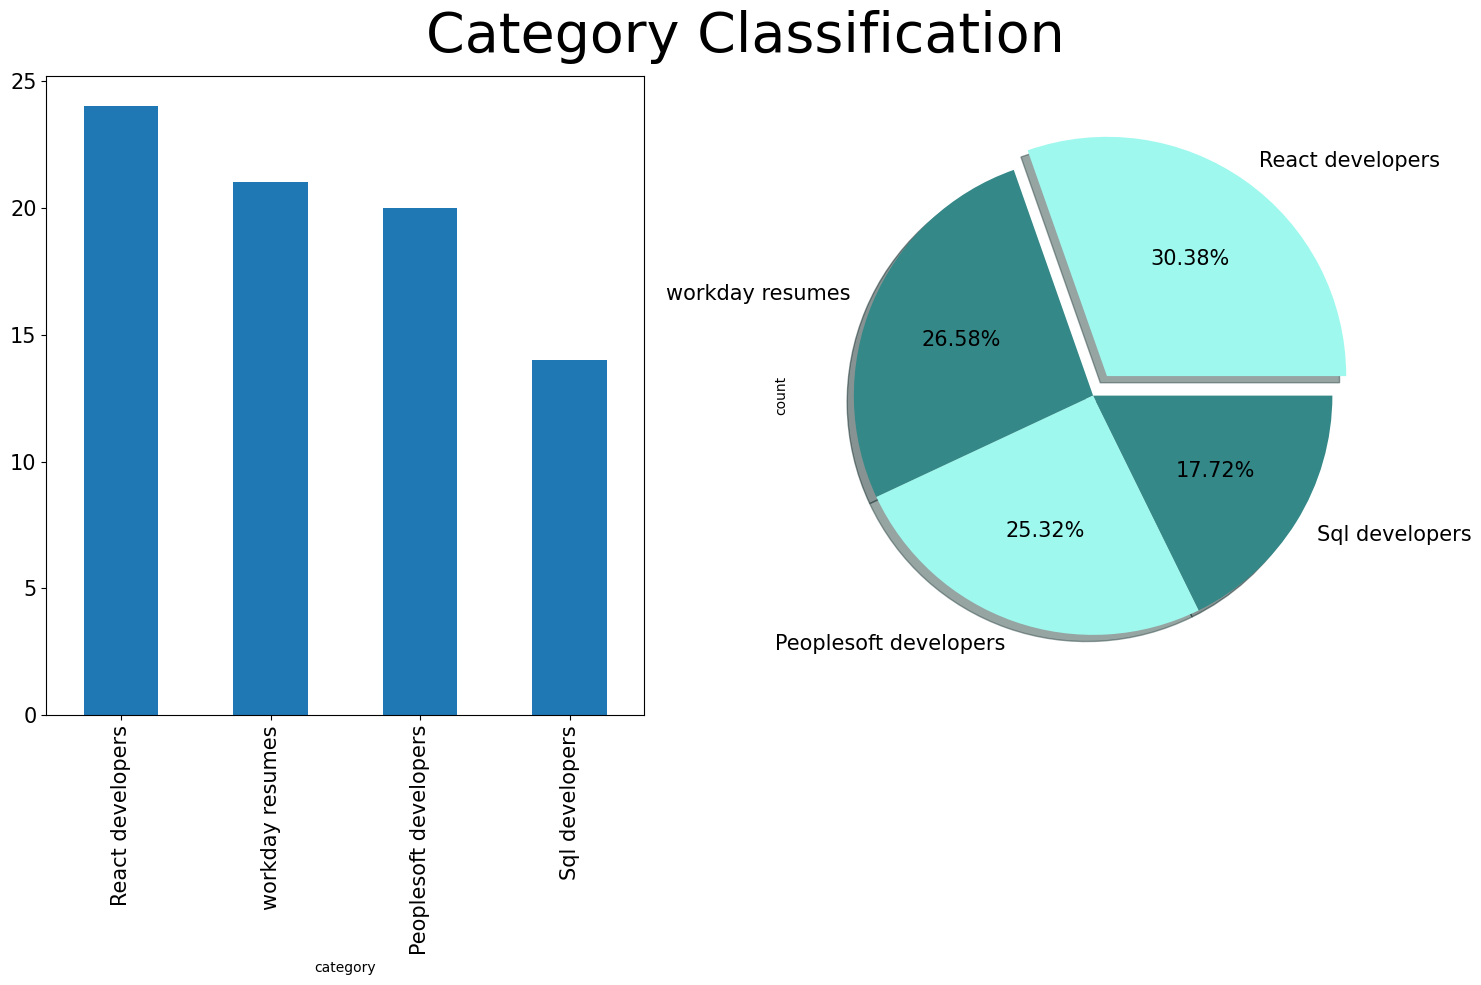

In [27]:
#extracting details from the dataset 

data_details(resume_df)

## Observation 

- We observe that we dont have no null values, no duplicates,and we have resume from 4 different categories, also our datatypes are in string format.


- From the plots we observe that most of our resumes our from React develeopers and least from sql develeopers

In [28]:
#saving our dataframe as csv file 
resume_df.to_csv("Resume.csv",index = False)

## EDA and Text Preprocessing

## Tokenization

In [29]:
tokens = resume_df.resume.map(word_tokenize)

In [30]:
resume_data = [Text.strip() for Text in resume_df.resume]#remove both leading and trailing characters
resume_data = [Text for Text in resume_data if Text]# # removes empty strings, because they are considered in Python as False
resume_data[0:2]

['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n

In [31]:
#oining all the data as text
review_text = ''.join(resume_data)
review_text[:1000]

'Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\

In [32]:
#replacing all /n
review_text =  review_text.replace('\n',"")
review_text[:1000]

'Name: Ravali P                                                                              Curriculum Vitae                                           Specialization: BE (computer science and Engg)          CAREER OBJECTIVE        CAREER OBJECTIVE  To utilize my technical skills for achieving the target and developing the best performance in organization.           EDUCATION         EDUCATION   Degree/Course  College/Institute University/ Board Percentage/ CGPA  Year of Passing       CGPACGPA                              BE   S J B Institute of technology   VTU  6.5 CGPA   2021                   Diploma Aryabharathi polytechnic  Karnataka State Board of Technical Examination, Bengaluru  60%                2017                       SSLC Empress girls high school   Karnataka Secondary Education Board  52.8%                2011  \t  MANUAL TESTING SKILLS     Strong knowledge in SDLC concepts.    Extensive knowledge in White Box Testing.    Good knowledge in Functional testing, Integrati

In [33]:
#extracting tokens from tokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens = tknzr.tokenize(review_text)
print(review_tokens[:100])

['Name', ':', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', ':', 'BE', '(', 'computer', 'science', 'and', 'Engg', ')', 'CAREER', 'OBJECTIVE', 'CAREER', 'OBJECTIVE', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', '.', 'EDUCATION', 'EDUCATION', 'Degree', '/', 'Course', 'College', '/', 'Institute', 'University', '/', 'Board', 'Percentage', '/', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '6.5', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'of', 'Technical', 'Examination', ',', 'Bengaluru', '60', '%', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '52.8', '%', '2011', 'MANUAL', 'TESTING', 'SKILLS', 'Strong', 'knowledge', 'in', 'SDLC', 'concepts', '.']


In [34]:
#joining all the tokens 
review_tokens_text = ' '.join(review_tokens)
review_tokens_text[:1000]

'Name : Ravali P Curriculum Vitae Specialization : BE ( computer science and Engg ) CAREER OBJECTIVE CAREER OBJECTIVE To utilize my technical skills for achieving the target and developing the best performance in organization . EDUCATION EDUCATION Degree / Course College / Institute University / Board Percentage / CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 6.5 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination , Bengaluru 60 % 2017 SSLC Empress girls high school Karnataka Secondary Education Board 52.8 % 2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts . Extensive knowledge in White Box Testing . Good knowledge in Functional testing , Integration testing , Extreme Knowledge on System Testing Good knowledge in Adhoc Testing , Reliability testing . Good Knowledge on Exploratory Testing Good knowledge in STLC concepts . Good knowledge in Test cases and Test scenarios . Good knowledge in globalization testing , comp

In [35]:
#removing puctuation 
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  CAREER OBJECTIVE CAREER OBJECTIVE To utilize my technical skills for achieving the target and developing the best performance in organization  EDUCATION EDUCATION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testing  compatibility testing  Thro

In [36]:
#remove urls from text 
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  CAREER OBJECTIVE CAREER OBJECTIVE To utilize my technical skills for achieving the target and developing the best performance in organization  EDUCATION EDUCATION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testing  compatibility testing  Thro

In [37]:
#removing all the letters that dont have semantic meaning
def remove_single_double_letters(corpus):
    # Tokenize the corpus
    tokens = re.findall(r'\b\w+\b', corpus)

    # Filter out words with single or double letters
    filtered_tokens = [token for token in tokens if len(token) > 0]

    # Recreate the corpus without the filtered words
    filtered_corpus = ' '.join(filtered_tokens)
    
    return filtered_corpus

filtered_corpus = remove_single_double_letters(no_url_text)
print(filtered_corpus[:1000])


Name Ravali P Curriculum Vitae Specialization BE computer science and Engg CAREER OBJECTIVE CAREER OBJECTIVE To utilize my technical skills for achieving the target and developing the best performance in organization EDUCATION EDUCATION Degree Course College Institute University Board Percentage CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination Bengaluru 60 2017 SSLC Empress girls high school Karnataka Secondary Education Board 528 2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts Extensive knowledge in White Box Testing Good knowledge in Functional testing Integration testing Extreme Knowledge on System Testing Good knowledge in Adhoc Testing Reliability testing Good Knowledge on Exploratory Testing Good knowledge in STLC concepts Good knowledge in Test cases and Test scenarios Good knowledge in globalization testing compatibility testing Through Knowledge on Regres

In [38]:
#apply tokenization on 100 words 
text_tokens = word_tokenize(filtered_corpus)
print(text_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'and', 'Engg', 'CAREER', 'OBJECTIVE', 'CAREER', 'OBJECTIVE', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', 'EDUCATION', 'EDUCATION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'of', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '528', '2011', 'MANUAL', 'TESTING', 'SKILLS', 'Strong', 'knowledge', 'in', 'SDLC', 'concepts', 'Extensive', 'knowledge', 'in', 'White', 'Box', 'Testing', 'Good', 'knowledge', 'in', 'Functional', 'testing', 'Integration', 'test

In [39]:
#removing stopwords from corpus 
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'Engg', 'CAREER', 'OBJECTIVE', 'CAREER', 'OBJECTIVE', 'To', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'EDUCATION', 'EDUCATION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '528', '2011', 'MANUAL', 'TESTING', 'SKILLS', 'Strong', 'knowledge', 'SDLC', 'concepts', 'Extensive', 'knowledge', 'White', 'Box', 'Testing', 'Good', 'knowledge', 'Functional', 'testing', 'Integration', 'testing', 'Extreme', 'Knowledge', 'System', 'Testing', 'Good', 'knowledge', 'Adhoc', 'T

In [40]:
#lowering letters of corpus
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'career', 'objective', 'career', 'objective', 'to', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'education', 'education', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'passing', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girls', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual', 'testing', 'skills', 'strong', 'knowledge', 'sdlc', 'concepts', 'extensive', 'knowledge', 'white', 'box', 'testing', 'good', 'knowledge', 'functional', 'testing', 'integration', 'testing', 'extreme', 'knowledge', 'system', 'testing', 'good', 'knowledge', 'adhoc', 't

In [41]:
#applying stemming 
ps = PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['name', 'ravali', 'p', 'curriculum', 'vita', 'special', 'be', 'comput', 'scienc', 'engg', 'career', 'object', 'career', 'object', 'to', 'util', 'technic', 'skill', 'achiev', 'target', 'develop', 'best', 'perform', 'organ', 'educ', 'educ', 'degre', 'cours', 'colleg', 'institut', 'univers', 'board', 'percentag', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institut', 'technolog', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechn', 'karnataka', 'state', 'board', 'technic', 'examin', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondari', 'educ', 'board', '528', '2011', 'manual', 'test', 'skill', 'strong', 'knowledg', 'sdlc', 'concept', 'extens', 'knowledg', 'white', 'box', 'test', 'good', 'knowledg', 'function', 'test', 'integr', 'test', 'extrem', 'knowledg', 'system', 'test', 'good', 'knowledg', 'adhoc', 'test', 'reliabl', 'test', 'good', 'knowledg', 'exploratori']


In [42]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

name ravali p curriculum vitae specialization be computer science engg career objective career objective to utilize technical skills achieving target developing best performance organization education education degree course college institute university board percentage cgpa year passing cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girls high school karnataka secondary education board 528 2011 manual testing skills strong knowledge sdlc concepts extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory


In [43]:
#applying lemmatization
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'career', 'objective', 'career', 'objective', 'to', 'utilize', 'technical', 'skill', 'achieve', 'target', 'develop', 'good', 'performance', 'organization', 'education', 'education', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual', 'testing', 'skill', 'strong', 'knowledge', 'sdlc', 'concept', 'extensive', 'knowledge', 'white', 'box', 'test', 'good', 'knowledge', 'functional', 'testing', 'integration', 'testing', 'extreme', 'knowledge', 'system', 'test', 'good', 'knowledge', 'adhoc', 'testing', 'reliabil

In [44]:
#joining lemmas into corpus
clean_review=' '.join(lemmas)
clean_review[:1000]

'name ravali p curriculum vitae specialization be computer science engg career objective career objective to utilize technical skill achieve target develop good performance organization education education degree course college institute university board percentage cgpa year pass cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 528 2011 manual testing skill strong knowledge sdlc concept extensive knowledge white box test good knowledge functional testing integration testing extreme knowledge system test good knowledge adhoc testing reliability test good knowledge exploratory test good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing through knowledge regression test good knowledge test plan sql skill good knowledge rdbms concept g1ood understanding f

## Applying on the DataFrame

In [45]:
#printing all the punctuation marks
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [46]:
#reading the first index
resume_df['resume'][0]

'Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\

- We observe lot of punctuation marks in our data 

In [47]:
#cleaning the corpus with regex library
def process_resume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~ """), ' ', resumeText)  # remove punctuation
    #resumeText = re.sub(r'[0-9]+', ' ', resumeText)  # remove numbers
    resumeText = re.sub(r'[^\x00-\x7f]', '', resumeText)  # remove non-ascii characters
    #resumeText = re.sub('\s+', ' ', resumeText)  # remove extra white space
    resumeText = re.sub('https?://\S+|www|WWW\.\S+', ' ', resumeText)  # remove URL words
    resumeText = re.sub('⇨', '', resumeText)  # remove symbols
    resumeText = re.sub('\n','', resumeText)  # remove all newline characters
    return resumeText.lower()


In [48]:
#applying the function
resume_df['clean_resume'] = resume_df["resume"].apply(lambda x: process_resume(x))
len(resume_df['clean_resume'][1])

1813

In [49]:
resume_df.head()

category  \
0  React developers   
1  React developers   
2  React developers   
3  React developers   
4  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            resume  \
0  Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...   
3  HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in the real world for overall growth of organization and my \n\nprofessional career. \n\nWORK EXPERIENCE EDUCATION \n\n1. Associate UI Developr \n\nCompan

In [50]:
#removing letters or words from the dataframe that has no semantic meaning
#def remove_short_words(text):
    #words = text.split()
    #filtered_words = [word for word in words if len(word) > 3]
    #filtered_text = ' '.join(filtered_words)
    #return filtered_text

In [51]:
#applying the function
#resume_df['clean_resume'] = resume_df['clean_resume'].apply(lambda x: remove_short_words(x))

In [52]:
resume_df.head()

category  \
0  React developers   
1  React developers   
2  React developers   
3  React developers   
4  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            resume  \
0  Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...   
3  HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in the real world for overall growth of organization and my \n\nprofessional career. \n\nWORK EXPERIENCE EDUCATION \n\n1. Associate UI Developr \n\nCompan

In [53]:
#remove url from clean resumes 
clean_resume = []
for index,row in resume_df.iterrows():
    #filtering all words that contains link
    words_without_links = [word for word in row.clean_resume.split()if'http'not in word]
    clean_resume.append(' '.join(words_without_links))
resume_df['clean_resume'] = clean_resume


In [54]:
resume_df.head()

category  \
0  React developers   
1  React developers   
2  React developers   
3  React developers   
4  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            resume  \
0  Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...   
3  HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in the real world for overall growth of organization and my \n\nprofessional career. \n\nWORK EXPERIENCE EDUCATION \n\n1. Associate UI Developr \n\nCompan

In [55]:
#removing emojis from the dataframe
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [56]:
#applying the function
resume_df['clean_resume'] = resume_df["clean_resume"].apply(lambda x: remove_emoji(x))
len(resume_df['clean_resume'][1])

1398

In [57]:
#reading the data after cleaning
resume_df.head()

category  \
0  React developers   
1  React developers   
2  React developers   
3  React developers   
4  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            resume  \
0  Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...   
3  HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in the real world for overall growth of organization and my \n\nprofessional career. \n\nWORK EXPERIENCE EDUCATION \n\n1. Associate UI Developr \n\nCompan

In [58]:
#removing stopwords from clean resume
my_stop_words = stopwords.words('english')
clean_resume = []
for index,row in resume_df.iterrows():
    #filtering out all the stopwords
    words_without_stopwords = [word for word in row.clean_resume.split()]
    #finally creating list of tuples containing stopwords(list)and sentiment type
    clean_resume.append(' '.join(words_without_stopwords))
resume_df['filtered_resume'] = clean_resume
resume_df.head()    

category  \
0  React developers   
1  React developers   
2  React developers   
3  React developers   
4  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            resume  \
0  Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...   
3  HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in the real world for overall growth of organization and my \n\nprofessional career. \n\nWORK EXPERIENCE EDUCATION \n\n1. Associate UI Developr \n\nCompan

## Applying tokenization on filtered_resume

In [59]:
Tokenized_resume = resume_df['filtered_resume'].apply(lambda x: x.split())
Tokenized_resume.head(10)

0    [name, ravali, p, curriculum, vitae, specialization, be, computer, science, and, engg, career, objective, career, objective, to, utilize, my, technical, skills, for, achieving, the, target, and, developing, the, best, performance, in, organization., education, education, degree, course, college, institute, university, board, percentage, cgpa, year, of, passing, cgpacgpa, be, s, j, b, institute, of, technology, vtu, 6.5, cgpa, 2021, diploma, aryabharathi, polytechnic, karnataka, state, board, of, technical, examination, bengaluru, 60, 2017, sslc, empress, girls, high, school, karnataka, secondary, education, board, 52.8, 2011, manual, testing, skills, strong, knowledge, in, sdlc, concepts., extensive, knowledge, in, white, box, testing., good, knowledge, in, functional, testing, integra...
1                [susovan, bag, seeking, a, challenging, position, in, the, field, of, science, and, technology, to, utilize, my, skills, for, organization, and, individual, growth, and, to, enha

## lemmatization on filtered Resume

In [60]:
word_lemmatizer = WordNetLemmatizer()
#nltk.download('omw-1.4')

Tokenized_resume = Tokenized_resume.apply(lambda x: [word_lemmatizer.lemmatize(i)for i in x])
Tokenized_resume

0     [name, ravali, p, curriculum, vitae, specialization, be, computer, science, and, engg, career, objective, career, objective, to, utilize, my, technical, skill, for, achieving, the, target, and, developing, the, best, performance, in, organization., education, education, degree, course, college, institute, university, board, percentage, cgpa, year, of, passing, cgpacgpa, be, s, j, b, institute, of, technology, vtu, 6.5, cgpa, 2021, diploma, aryabharathi, polytechnic, karnataka, state, board, of, technical, examination, bengaluru, 60, 2017, sslc, empress, girl, high, school, karnataka, secondary, education, board, 52.8, 2011, manual, testing, skill, strong, knowledge, in, sdlc, concepts., extensive, knowledge, in, white, box, testing., good, knowledge, in, functional, testing, integratio...
1                            [susovan, bag, seeking, a, challenging, position, in, the, field, of, science, and, technology, to, utilize, my, skill, for, organization, and, individual, growth, a

In [61]:
#adding our tokenized resume over filtered resume for keywords
for i,tokens in enumerate(Tokenized_resume):
    Tokenized_resume[i] = ' '.join(tokens)
resume_df['filtered_resume'] = Tokenized_resume
resume_df.head()

category  \
0  React developers   
1  React developers   
2  React developers   
3  React developers   
4  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            resume  \
0  Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   \n\n  \n\nSKILLS  \n\nCCNA -   Routing  &  Switching  subnetting  \n\nProgramming:  C,   C++,Java,  HTML,CSS,  SQL   \n\n  \n\nOOPS,  Algorithms,  Data  Structures,DBMS,  Networking  \n\n\t\t\tOS  (Linux): Linux \t  System  Administration  with  Troubleshooting  \n\n  \n\nSOFT  SKILLS  \n\n\t\t\t Leadership, \t  Collaboration,  Good  communication  and  customer  Handling  skills.  \n\n   \n\nLANGUAGES  \n\n\t\t\t  English(Fluent), \t  Hindi(Fluent),  Bengali(Native),  Telugu  \n\n  \n\n  \n\nPROJECTS   \n\n  \n\n...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER OBJECTIVE:\n\n\n\nTo secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.\n\n\n\nACADEMIC QUALIFICATIONS:\n\n\n\n\n\nQualification\n\nInstitute\n\nBoard (or) University\n\nYear of completion\n\nPercentage/CGPA\n\nB.Tech (E.C.E)\n\nAudisankara College of Engineering & Technology,Gudur.\n\nJNTU Anantapur.\n\n2018\n\n77.3\n\nIntermediate\n\nNarayana Junior college, Naidupet.\n\nBoard of\n\nIntermediate, AP.\n\n2014\n\n89.5\n\nSSC\n\nNavodaya High School,Naidupet\n\nBoard of Secondary education, AP.\n\n2012\n\n6.7\n\n\n\nPROJECT:\n\n\n\nTitle\t:Density based Traffic Control System USING ARDUINO.\n\n\n\nDuration:4 months.\n\n\n\n...   
3  HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in the real world for overall growth of organization and my \n\nprofessional career. \n\nWORK EXPERIENCE EDUCATION \n\n1. Associate UI Developr \n\nCompan

### converting our categorical data

In [62]:
resume_df['category'] = resume_df['category'].astype('category')

## Applying count Vectorizer

In [63]:
#fitting our count vectorizer
cv = CountVectorizer()
resume_cv = cv.fit_transform(lemmas)


In [64]:
#printing out features
print(cv.vocabulary_)

{'name': 3370, 'ravali': 4130, 'curriculum': 1521, 'vitae': 5532, 'specialization': 4742, 'be': 931, 'computer': 1315, 'science': 4473, 'engg': 1957, 'career': 1111, 'objective': 3481, 'to': 5220, 'utilize': 5442, 'technical': 5087, 'skill': 4671, 'achieve': 480, 'target': 5047, 'develop': 1711, 'good': 2374, 'performance': 3733, 'organization': 3581, 'education': 1879, 'degree': 1645, 'course': 1460, 'college': 1258, 'institute': 2713, 'university': 5380, 'board': 993, 'percentage': 3730, 'cgpa': 1158, 'year': 5721, 'pass': 3677, 'cgpacgpa': 1161, 'technology': 5103, 'vtu': 5558, '65': 368, '2021': 245, 'diploma': 1766, 'aryabharathi': 775, 'polytechnic': 3823, 'karnataka': 2904, 'state': 4840, 'examination': 2060, 'bengaluru': 949, '60': 353, '2017': 209, 'sslc': 4809, 'empress': 1937, 'girl': 2341, 'high': 2495, 'school': 4469, 'secondary': 4501, '528': 329, '2011': 160, 'manual': 3136, 'testing': 5142, 'strong': 4875, 'knowledge': 2929, 'sdlc': 4496, 'concept': 1318, 'extensive': 2

In [65]:
#printing the array 
print(resume_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
#printing shape
print(resume_cv.toarray().shape)

(42042, 5743)


## Applying Count Vectorizer on NGrams (Bag of words)

In [67]:
#fitting our unigram,bigram and trigram
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_range=cv_ngram_range.fit_transform(lemmas)

In [68]:
#printing out our ngrams
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_range.toarray())

['006' '01' '032019' ... 'zerozilla' 'zone' 'zp']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
#dropping the contents not required
resume_df2 = resume_df.drop(['resume','clean_resume'],axis = 1) 

In [70]:
resume_df2.head()

category  \
0  React developers   
1  React developers   
2  React developers   
3  React developers   
4  React developers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   filtered_resume  
0  name ravali p curriculum vitae specialization be computer science and engg career objective career objective to utilize my technical skill for achieving the target and developing the best performance in organization. education education degree course college institute university board percentage cgpa year of passing cgpacgpa be s j b institute of technology vtu 6.5 cgpa 2021 diploma aryabharathi polytechnic karnataka state board of technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 52.8 2011 manual testing skill strong knowledge in sdlc concepts. extensive knowledge in white box testing. good knowledge in functional testing integration testing extreme knowledge on system testing good knowledge in adhoc testing reliability testing. ...  
1  susovan bag seeking a challenging position in the field of science and technology to utilize my skill for organization and individual growth and to enhance my knowledge from my academic learning to give my best to the organization. skill ccna routing switching subnetting programming c c java html cs sql oops algorithm data structure dbms networking o linux linux system administration with troubleshooting soft skill leadership collaboration good communication and customer handling skills. language english fluent hindi fluent bengali native telugu project smart agriculture built a product for farmer using iot a a solution automatic water motor controller 2019 2020 iot android and api technology combined to automate work of water motor controller using sensors. bookstore management interf...  
2  kanumuru deepak reddy career objective to secure a position in a reputed organization where i can efficiently contribute my knowledge and skill to the growth of the organization and build my professional career.academic qualification qualificationinstituteboard or universityyear of completionpercentage cgpab.tech e.c.e audisankara college of engineering technology gudur.jntu anantapur.201877.3intermediatenarayana junior college naidupet.board ofintermediate ap.201489.5sscnavodaya high school naidupetboard of secondary education ap.20126.7project title density based traffic control system using arduino.duration 4 months.description traffic congestion is a severe problem in most of the city across the world and it ha become a nightmare for the citizens. it is caused by delay in signal in...  
3  haripriya battina experience a ui developer in reactjs javascript. phone 91 9908576950 gmail haripriyabattini gmai.com location visakhapatnam job objective looking for a challenging role to put my experience in various aspect of technology with an objective to be a leading source of information and guidance concerning thtechnological requirements. want to be a part of a reputed organization that allows me to effectively use my technical skill in the real world for overall growth of organization and my professional career. work experience education 1. associate ui developr company blue yonder hyderabad. work done on copernicus project. the ma

## Named entity Recognition (NER)

In [71]:
#link for java skills list for ner: https://github.com/kingabzpro/jobzilla_ai/blob/main/jz_skill_patterns.jsonl
#extracting the skill json file 
skill_pattern_path = "C:/Users/Adith/Desktop/Data_Science_Excel R/Projects_Datascience/resume_classification/Resumes/validation_test/jz_skill_patterns.jsonl"


In [72]:
#customising our own entities using entity ruler
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [73]:
#adding colors to entities for the resume
options=[{"ents": "category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(resume_df2["filtered_resume"].iloc[0])
spacy.displacy.render(sent, style="ent", jupyter=True, options=options)

In [74]:
#displaying for all resume
sent2 = nlp(clean_review)
spacy.displacy.render(sent2, style="ent", jupyter=True, options=options)

In [75]:
#labeling labels according named entity recognition
#nlp = spacy.load('en_core_web_lg')
#one_block = clean_review
#doc_block = nlp(one_block)
#spacy.displacy.render(doc_block,style = 'ent',jupyter=True)

In [76]:
#printing position of words 
for token in sent2[0:20]:
    print(token,token.pos_)

name PROPN
ravali VERB
p NOUN
curriculum NOUN
vitae NOUN
specialization NOUN
be AUX
computer NOUN
science NOUN
engg NOUN
career NOUN
objective ADJ
career NOUN
objective NOUN
to PART
utilize VERB
technical ADJ
skill NOUN
achieve VERB
target NOUN


In [77]:
#filtering only Noun,verbs and adjectives
nouns_verbs_adj = [token.text for token in sent2 if token.pos_ in('NOUN','VERB','ADJECTIVE')]
print(nouns_verbs_adj[100:200])

['methdology', 'knowledge', 'scrum', 'methodology', 'expertise', 'sprint', 'planning', 'meet', 'knowledge', 'meet', 'knowledge', 'sprint', 'meet', 'knowledge', 'product', 'backlog', 'meeting', 'bug', 'triage', 'meeting', 'knowledge', 'normalization', 'skill', 'knowledge', 'method', 'overload', 'method', 'override', 'understand', 'understanding', 'knowledge', 'constructor', 'knowledge', 'abstraction', 'knowledge', 'encapsulation', 'knowledge', 'inheritance', 'knowledge', 'collection', 'project', 'project', 'year', 'completion', 'farmland', 'crop', 'prevention', 'animal', 'intrusion', 'detection', 'use', 'library', 'management', 'system', 'training', 'course', 'training', 'course', 'conduct', 'duration', 'internship', 'zerozilla', 'month', 'exposure', 'industry', 'skill', 'learn', 'zerozilla', 'software', 'company', 'bengaluru', 'webtechnology', 'php', 'achievement', 'certify', 'cyber', 'security', 'training', 'sjbit', 'bengaluru', 'certify', 'volleyball', 'distict', 'level', 'assignemen

In [78]:
#counting nouns,verbs and adjectives 
cv = CountVectorizer()
X2 = cv.fit_transform(nouns_verbs_adj)
sum_words = X2.sum(axis = 0)

words_freq = [(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:11] #viewing top 10 verbs.nouns and adjectives

word  count
0    experience    506
1   application    487
2           use    470
3        server    443
4        report    441
5          work    406
6   integration    348
7        create    328
8       process    289
9      database    270
10     business    258

<Axes: title={'center': 'top 10 verbs,adjectives and nouns'}, ylabel='word'>

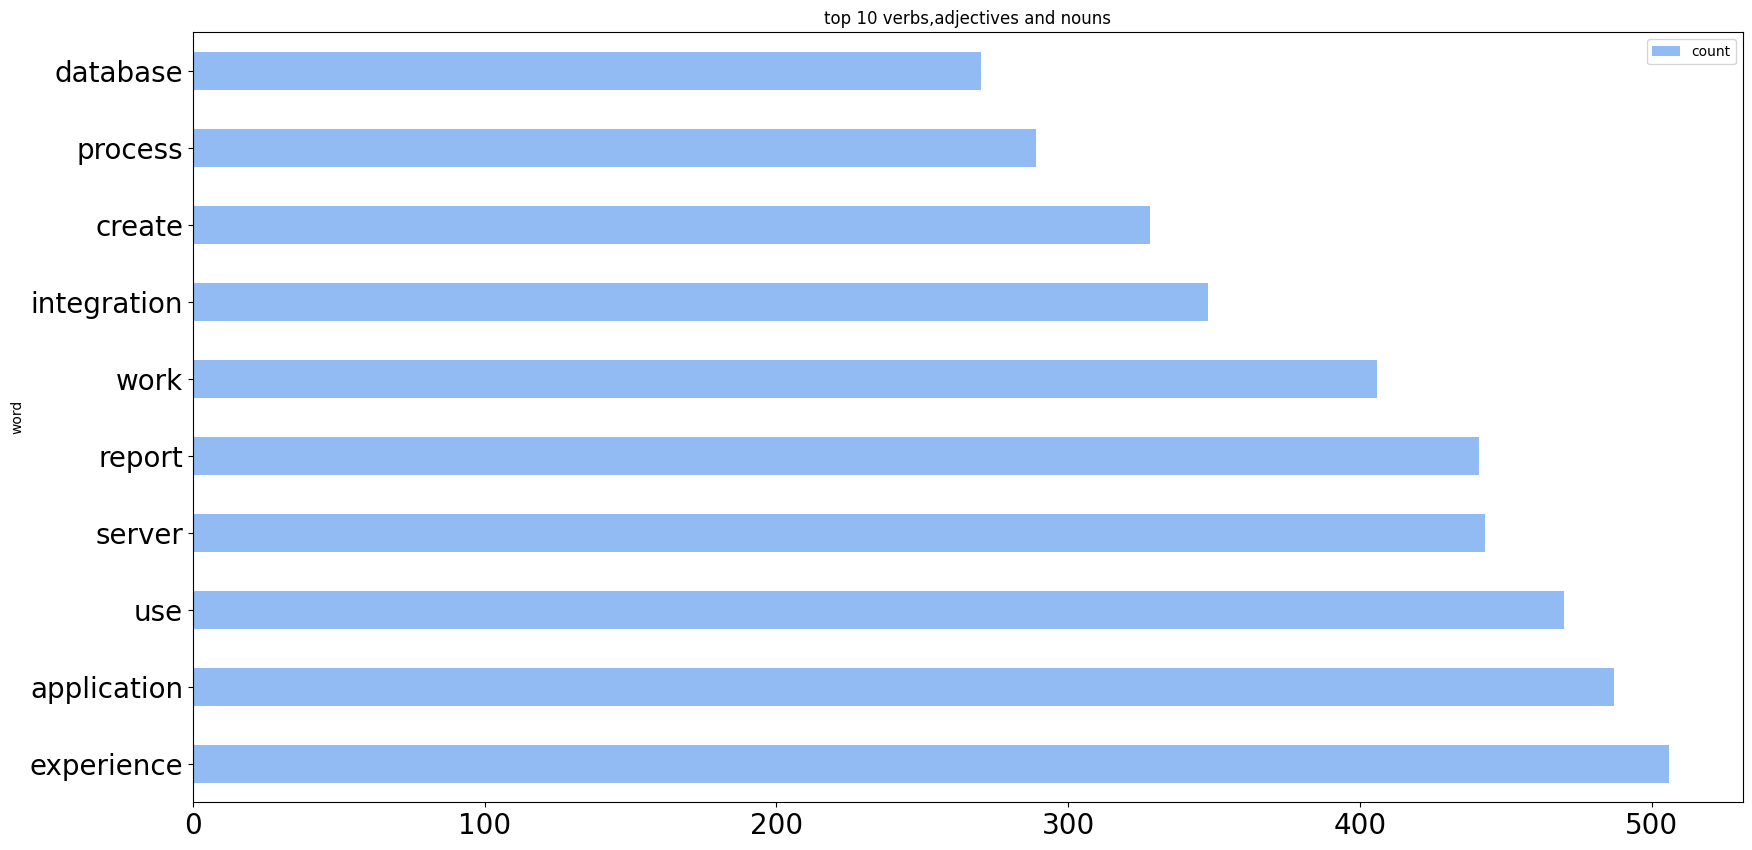

In [79]:
#top 10 verbs,adjectives and nouns
wd_df[0:10].plot.barh(x = 'word',figsize =(20,10),title = 'top 10 verbs,adjectives and nouns',color = '#91BBF2',fontsize = 20)

In [80]:
#locating bigrams in our text 
text = [clean_review]
bigrams =  [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
print(bigrams[:20])
           

[('name', 'ravali'), ('ravali', 'p'), ('p', 'curriculum'), ('curriculum', 'vitae'), ('vitae', 'specialization'), ('specialization', 'be'), ('be', 'computer'), ('computer', 'science'), ('science', 'engg'), ('engg', 'career'), ('career', 'objective'), ('objective', 'career'), ('career', 'objective'), ('objective', 'to'), ('to', 'utilize'), ('utilize', 'technical'), ('technical', 'skill'), ('skill', 'achieve'), ('achieve', 'target'), ('target', 'develop')]


In [81]:
#locating trigrams
text = [clean_review]
trigrams = [t for l in text for t in zip(l.split(" ")[:-2], l.split(" ")[1:-1], l.split(" ")[2:])]
print(trigrams[:20])

[('name', 'ravali', 'p'), ('ravali', 'p', 'curriculum'), ('p', 'curriculum', 'vitae'), ('curriculum', 'vitae', 'specialization'), ('vitae', 'specialization', 'be'), ('specialization', 'be', 'computer'), ('be', 'computer', 'science'), ('computer', 'science', 'engg'), ('science', 'engg', 'career'), ('engg', 'career', 'objective'), ('career', 'objective', 'career'), ('objective', 'career', 'objective'), ('career', 'objective', 'to'), ('objective', 'to', 'utilize'), ('to', 'utilize', 'technical'), ('utilize', 'technical', 'skill'), ('technical', 'skill', 'achieve'), ('skill', 'achieve', 'target'), ('achieve', 'target', 'develop'), ('target', 'develop', 'good')]


In [82]:
#extracting the most common words in the corpus 
set_stopwords = set(stopwords.words('english')+(['''''',"''"]))
total_words = []
sentences = resume_df2['filtered_resume'].values
clean_sentences = ""
for records in sentences:
    clean_sentences += records
    req_words = nltk.word_tokenize(records)
    for word in req_words:
        if word not in set_stopwords and word not in string.punctuation:
            total_words.append(word)
wordfreqdist = nltk.FreqDist(total_words)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 513), ('application', 467), ('server', 458), ('report', 424), ('peoplesoft', 413), ('workday', 392), ('using', 369), ('integration', 340), ('data', 322), ('project', 290), ('process', 281), ('business', 271), ('database', 265), ('sql', 261), ('web', 233), ('system', 228), ('knowledge', 206), ('tool', 201), ('client', 183), ('worked', 182), ('like', 178), ('support', 174), ('hcm', 172), ('service', 170), ('team', 167), ('development', 157), ('technology', 154), ('people', 154), ('design', 153), ('involved', 150), ('creating', 148), ('skill', 147), ('good', 147), ('role', 145), ('working', 145), ('various', 144), ('requirement', 144), ('change', 141), ('testing', 138), ('eib', 136), ('user', 133), ('security', 129), ('production', 128), ('management', 127), ('oracle', 127), ('environment', 123), ('core', 121), ('custom', 121), ('domain', 119), ('studio', 118), ('technical', 115), ('work', 115), ('new', 114), ('scheduler', 113), ('developer', 112), ('year', 110), ('created

In [83]:
#building wordcloud 
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

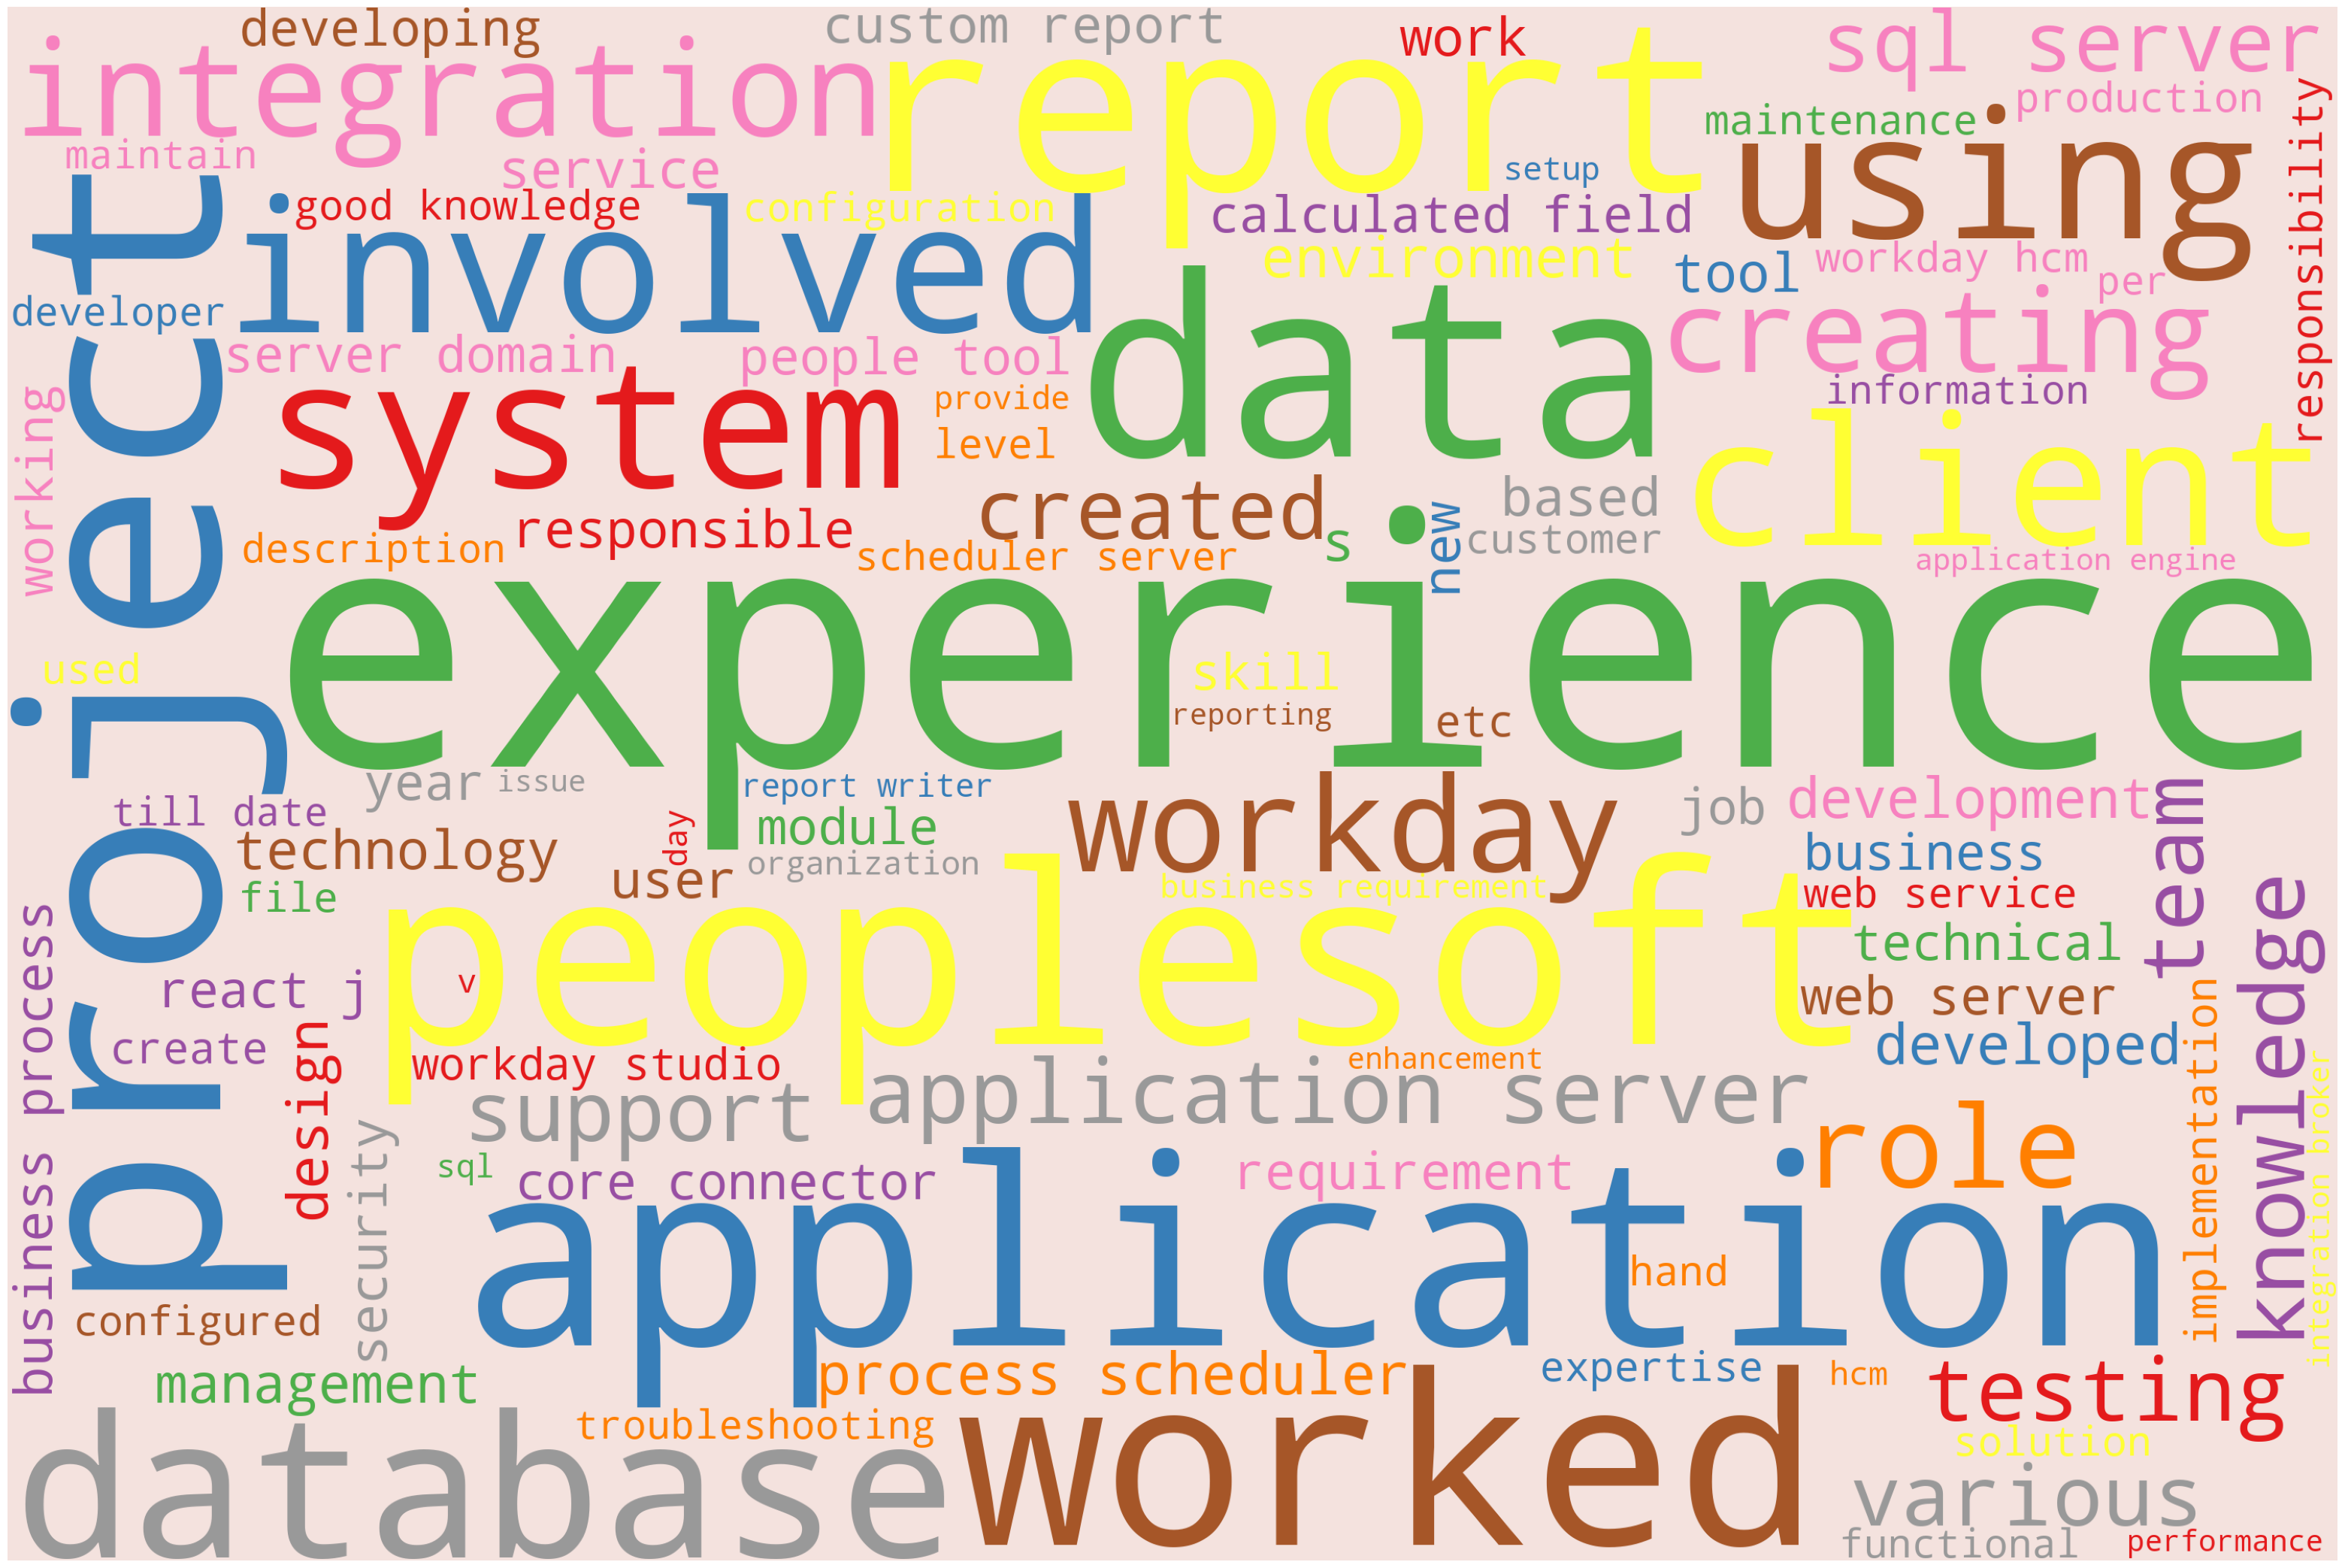

In [84]:
#generating word cloud  with clean sentences
wordcloud = WordCloud(width= 3000, height= 2000,background_color='#F4E2DE',max_words=100,
                     colormap='Set1',contour_color='black',contour_width=2).generate(clean_sentences)
plot_cloud(wordcloud)

In [85]:
#sorting categories
categories = np.sort(resume_df2['category'].unique())
categories

array(['Peoplesoft developers', 'React developers', 'Sql developers',
       'workday resumes'], dtype=object)

In [86]:
#displaying resumes according categories
data_categories = [resume_df2[resume_df2['category'] == category].loc[:, ['filtered_resume', 'category']] for category in categories]
data_categories

[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    filtered_resume  \
 45  anubhav kumar singh core competency scripting shell scriptingapplication peoplesoft hcm financialsoperating system linux windowsweb app server weblogic tuxedordbms oraclerepository github

In [87]:
#building wordcloud 
def wordcloud(df):
    txt = ''.join(txt for txt in resume_df2['filtered_resume'])
    wordcloud = WordCloud(
    height = 2000,
    width = 4000,
    colormap = 'Set1',
    background_color='#F4E2DE'
    ).generate(txt)
    
    return wordcloud
  

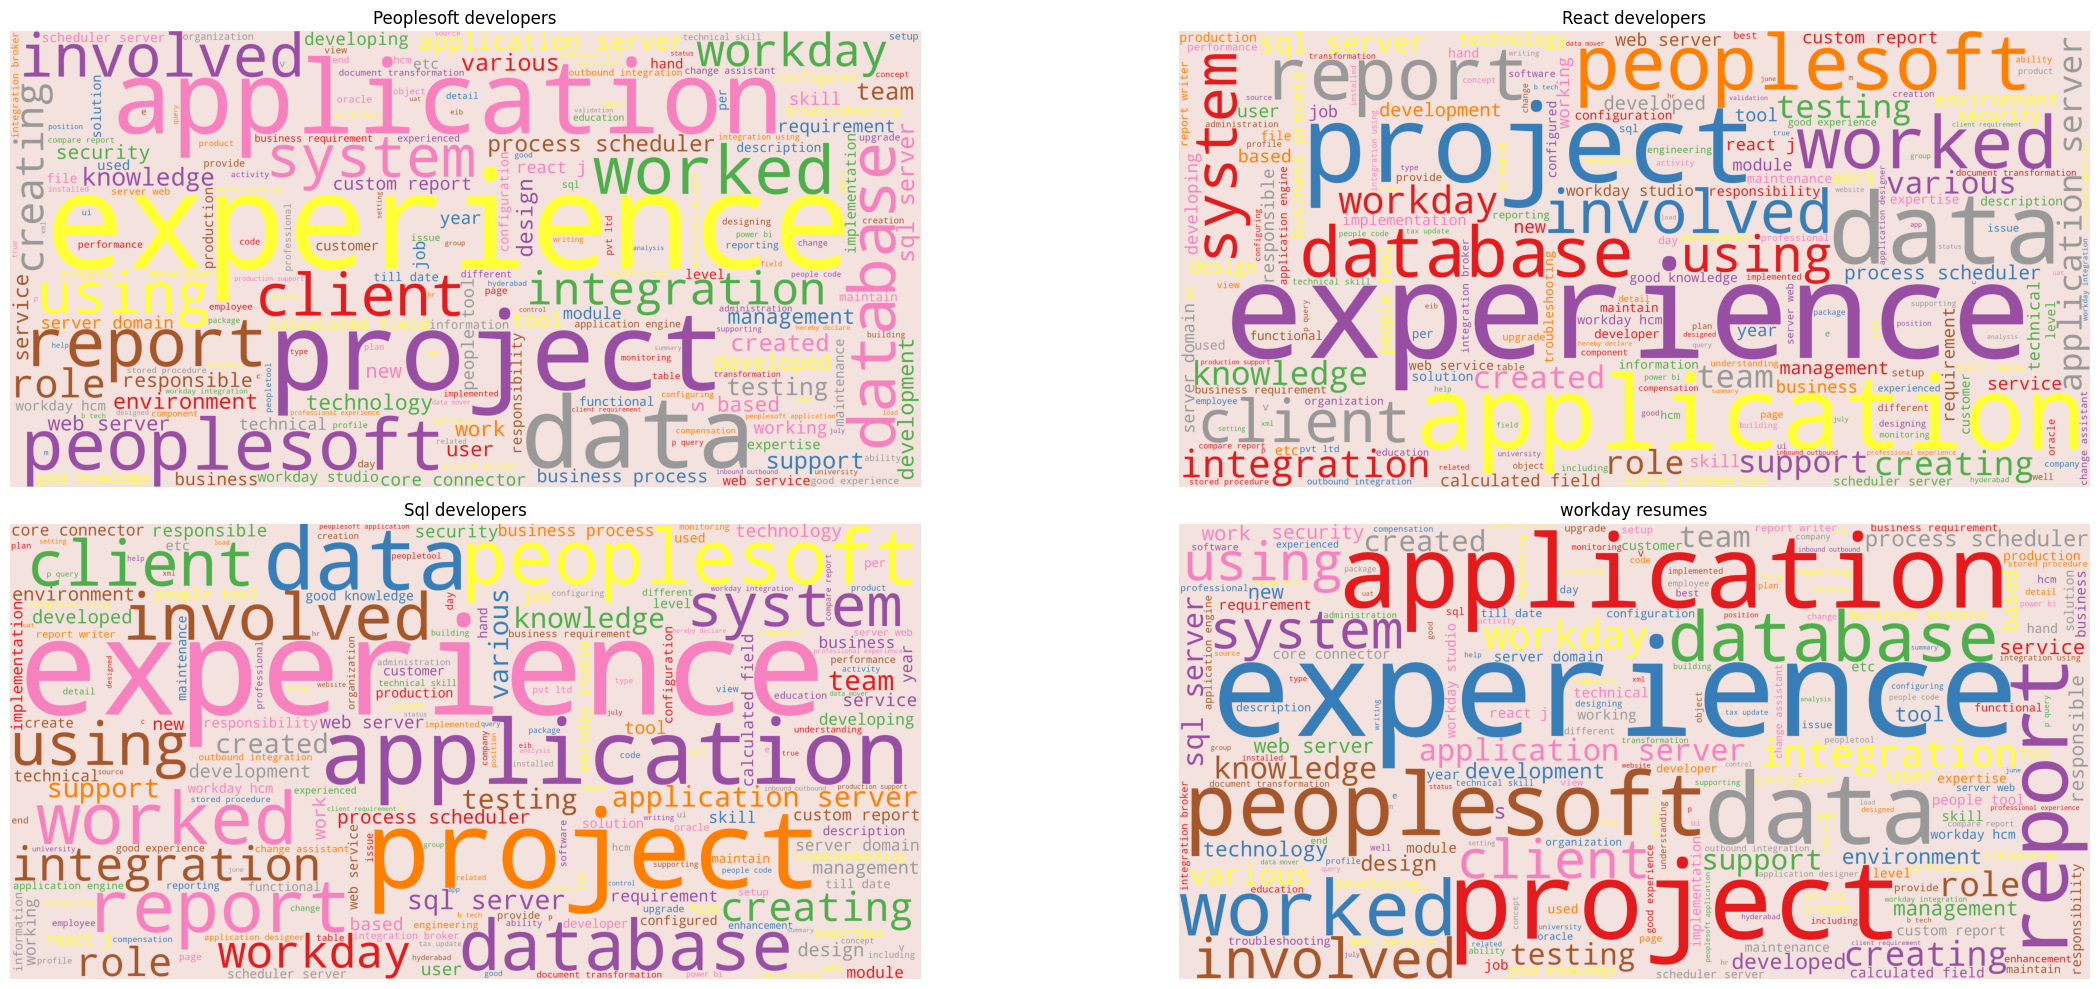

In [88]:
#plotting wordcloud for each category of resume 
plt.figure(figsize=(25, 10))

rows = 2
cols = 2

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(rows, cols, i + 1).set_title(category)   
    plt.imshow(wc)
    plt.axis('off')

plt.subplots_adjust(hspace=0.1)#Adjust the vertical spacing between subplots
plt.tight_layout()
plt.show()
plt.close()

## Model Building With classification algorithms

In [89]:
#converting our category feature to dummies using label encoder
resume_df3 = resume_df2.copy()
var_mod = ['category']
le = LabelEncoder()
for i in var_mod:
    resume_df3[i] = le.fit_transform(resume_df3[i])

In [90]:
resume_df3.head()

category  \
0         1   
1         1   
2         1   
3         1   
4         1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   filtered_resume  
0  name ravali p curriculum vitae specialization be computer science and engg career objective career objective to utilize my technical skill for achieving the target and developing the best performance in organization. education education degree course college institute university board percentage cgpa year of passing cgpacgpa be s j b institute of technology vtu 6.5 cgpa 2021 diploma aryabharathi polytechnic karnataka state board of technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 52.8 2011 manual testing skill strong knowledge in sdlc concepts. extensive knowledge in white box testing. good knowledge in functional testing integration testing extreme knowledge on system testing good knowledge in adhoc testing reliability testing. ...  
1  susovan bag seeking a challenging position in the field of science and technology to utilize my skill for organization and individual growth and to enhance my knowledge from my academic learning to give my best to the organization. skill ccna routing switching subnetting programming c c java html cs sql oops algorithm data structure dbms networking o linux linux system administration with troubleshooting soft skill leadership collaboration good communication and customer handling skills. language english fluent hindi fluent bengali native telugu project smart agriculture built a product for farmer using iot a a solution automatic water motor controller 2019 2020 iot android and api technology combined to automate work of water motor controller using sensors. bookstore management interf...  
2  kanumuru deepak reddy career objective to secure a position in a reputed organization where i can efficiently contribute my knowledge and skill to the growth of the organization and build my professional career.academic qualification qualificationinstituteboard or universityyear of completionpercentage cgpab.tech e.c.e audisankara college of engineering technology gudur.jntu anantapur.201877.3intermediatenarayana junior college naidupet.board ofintermediate ap.201489.5sscnavodaya high school naidupetboard of secondary education ap.20126.7project title density based traffic control system using arduino.duration 4 months.description traffic congestion is a severe problem in most of the city across the world and it ha become a nightmare for the citizens. it is caused by delay in signal in...  
3  haripriya battina experience a ui developer in reactjs javascript. phone 91 9908576950 gmail haripriyabattini gmai.com location visakhapatnam job objective looking for a challenging role to put my experience in various aspect of technology with an objective to be a leading source of information and guidance concerning thtechnological requirements. want to be a part of a reputed organization that allows me to effectively use my technical skill in the real world for overall growth of organization and my professional career. work experience education 1. associate ui developr company blue yonder hyderabad. work done on copernicus project. the main moto of this project is it is gtm go 

## TF- IDF Vectorizer

In [91]:
#converting our corpus to vectors using TF-IDF Vectorizer
target_text = resume_df3['filtered_resume'].values
target_cat = resume_df3['category'].values
word_vec = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vec.fit(target_text)
word_feat = word_vec.transform(target_text)

In [92]:
X_train,X_test,y_train,y_test = train_test_split(word_feat,target_cat,random_state=0,test_size=0.2,stratify=target_cat)
X_train.shape,X_test.shape

((63, 5380), (16, 5380))

## Application of Classification Algorithms

In [93]:
#evaluate algorithms
num_folds = 10
scoring = 'accuracy'

#fitting algorithms
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('MLG',MultinomialNB()))


results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=None)
    cv_results = cross_val_score(model,
                                X_train,
                                y_train,
                                cv = kfold,
                                scoring=scoring,
                                error_score='raise')
    results.append(cv_results)
    names.append(name)
    msg = "%s/:%f(%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
    # Perform cross-validation and collect the classification report for each model
    classify_reports = {}
    classify_matrix = {}
    for name, model in models:
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        report = metrics.classification_report(y_test, prediction,output_dict=True)
        matrix = metrics.confusion_matrix(y_test,prediction)
        classify_reports[name] = report
        classify_matrix[name] = matrix

# Print the classification reports for all models
for name, report in classify_reports.items():
    matrix = classify_matrix[name]
    print(f"Classification Report for {name}:")
    print(f"confusion matrix for {name}:")
    print(report)
    print(matrix)
report_df = pd.DataFrame(columns=['Classifier', 'Precision', 'Recall', 'F1-Score'])
report_data = []
for name, report in classify_reports.items():
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    accuracy = report['accuracy']
    
    report_data.append({'Classifier': name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score, 'Accuracy': accuracy})

report_df = pd.DataFrame(report_data)
print(report_df)

LR/:0.871429(0.117707)
KNN/:0.916667(0.111803)
CART/:0.950000(0.106719)
SVM/:0.823810(0.111778)
MLG/:0.792857(0.138444)
Classification Report for LR:
confusion matrix for LR:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '1': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 5}, '2': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'accuracy': 0.9375, 'macro avg': {'precision': 0.9583333333333334, 'recall': 0.9166666666666666, 'f1-score': 0.9272727272727272, 'support': 16}, 'weighted avg': {'precision': 0.9479166666666667, 'recall': 0.9375, 'f1-score': 0.9340909090909091, 'support': 16}}
[[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]
Classification Report for KNN:
confusion matrix for KNN:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'sup

## Application of ensemble methods

In [94]:
#evaluate algorithms
num_folds = 10
scoring = 'accuracy'

#fitting algorithms
models = []
models.append(('AB',AdaBoostClassifier()))
models.append(('GBM',GradientBoostingClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('BG',BaggingClassifier()))
models.append(('ET',ExtraTreesClassifier()))
models.append(('XGB',XGBClassifier()))

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=None)
    cv_results = cross_val_score(model,
                                X_train,
                                y_train,
                                cv = kfold,
                                scoring=scoring,
                                error_score='raise')
    results.append(cv_results)
    names.append(name)
    msg = "%s/:%f(%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
       # Perform cross-validation and collect the classification report for each model
    ensemble_reports = {}
    ensemble_matrix = {}
    for name, model in models:
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        report = metrics.classification_report(y_test, prediction,output_dict=True)
        matrix = metrics.confusion_matrix(y_test,prediction)
        ensemble_reports[name] = report
        ensemble_matrix[name] = matrix
# Print the classification reports for all models
for name, report in ensemble_reports.items():
    matrix = ensemble_matrix[name]
    print(f"ensemble reports for {name}:")
    print(f"confusion matrix for {name}:")
    print(report)
    print(matrix)
ensemble_df = pd.DataFrame(columns=['Classifier', 'Precision', 'Recall', 'F1-Score'])
ensemble_data = []
for name, report in ensemble_reports.items():
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    accuracy = report['accuracy']
    
    ensemble_data.append({'Classifier': name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score, 'Accuracy': accuracy})

ensemble_df = pd.DataFrame(ensemble_data)

print(ensemble_df)

AB/:0.669048(0.141441)
GBM/:0.952381(0.104328)
RF/:0.950000(0.076376)
BG/:0.952381(0.104328)
ET/:0.933333(0.110554)
XGB/:0.952381(0.104328)
ensemble reports for AB:
confusion matrix for AB:
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, '1': {'precision': 0.5555555555555556, 'recall': 1.0, 'f1-score': 0.7142857142857143, 'support': 5}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'accuracy': 0.75, 'macro avg': {'precision': 0.6388888888888888, 'recall': 0.75, 'f1-score': 0.6785714285714286, 'support': 16}, 'weighted avg': {'precision': 0.6111111111111112, 'recall': 0.75, 'f1-score': 0.6607142857142857, 'support': 16}}
[[0 4 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]
ensemble reports for GBM:
confusion matrix for GBM:
{'0': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 4}, '1': {'precision': 0.7142857142857143, 'recall': 1.0, 'f1-score': 0.

In [95]:
#reading table for classification methods
report_df

Classifier  Precision  Recall  F1-Score  Accuracy
0         LR   0.947917  0.9375  0.934091    0.9375
1        KNN   1.000000  1.0000  1.000000    1.0000
2       CART   0.910714  0.8750  0.864583    0.8750
3        SVM   0.947917  0.9375  0.934091    0.9375
4        MLG   0.916667  0.8750  0.856250    0.8750

In [96]:
#reading table for ensemble techniques
ensemble_df

Classifier  Precision  Recall  F1-Score  Accuracy
0         AB   0.611111   0.750  0.660714     0.750
1        GBM   0.910714   0.875  0.864583     0.875
2         RF   1.000000   1.000  1.000000     1.000
3         BG   1.000000   1.000  1.000000     1.000
4         ET   1.000000   1.000  1.000000     1.000
5        XGB   1.000000   1.000  1.000000     1.000

In [97]:
#concating evaluation table 
table_eval = pd.concat([report_df,ensemble_df],ignore_index=True)

In [98]:
table_eval

Classifier  Precision  Recall  F1-Score  Accuracy
0          LR   0.947917  0.9375  0.934091    0.9375
1         KNN   1.000000  1.0000  1.000000    1.0000
2        CART   0.910714  0.8750  0.864583    0.8750
3         SVM   0.947917  0.9375  0.934091    0.9375
4         MLG   0.916667  0.8750  0.856250    0.8750
5          AB   0.611111  0.7500  0.660714    0.7500
6         GBM   0.910714  0.8750  0.864583    0.8750
7          RF   1.000000  1.0000  1.000000    1.0000
8          BG   1.000000  1.0000  1.000000    1.0000
9          ET   1.000000  1.0000  1.000000    1.0000
10        XGB   1.000000  1.0000  1.000000    1.0000

In [99]:
table_eval = table_eval.sort_values(ascending=False,by='Accuracy')

In [100]:
table_eval

Classifier  Precision  Recall  F1-Score  Accuracy
1         KNN   1.000000  1.0000  1.000000    1.0000
7          RF   1.000000  1.0000  1.000000    1.0000
8          BG   1.000000  1.0000  1.000000    1.0000
9          ET   1.000000  1.0000  1.000000    1.0000
10        XGB   1.000000  1.0000  1.000000    1.0000
0          LR   0.947917  0.9375  0.934091    0.9375
3         SVM   0.947917  0.9375  0.934091    0.9375
2        CART   0.910714  0.8750  0.864583    0.8750
4         MLG   0.916667  0.8750  0.856250    0.8750
6         GBM   0.910714  0.8750  0.864583    0.8750
5          AB   0.611111  0.7500  0.660714    0.7500

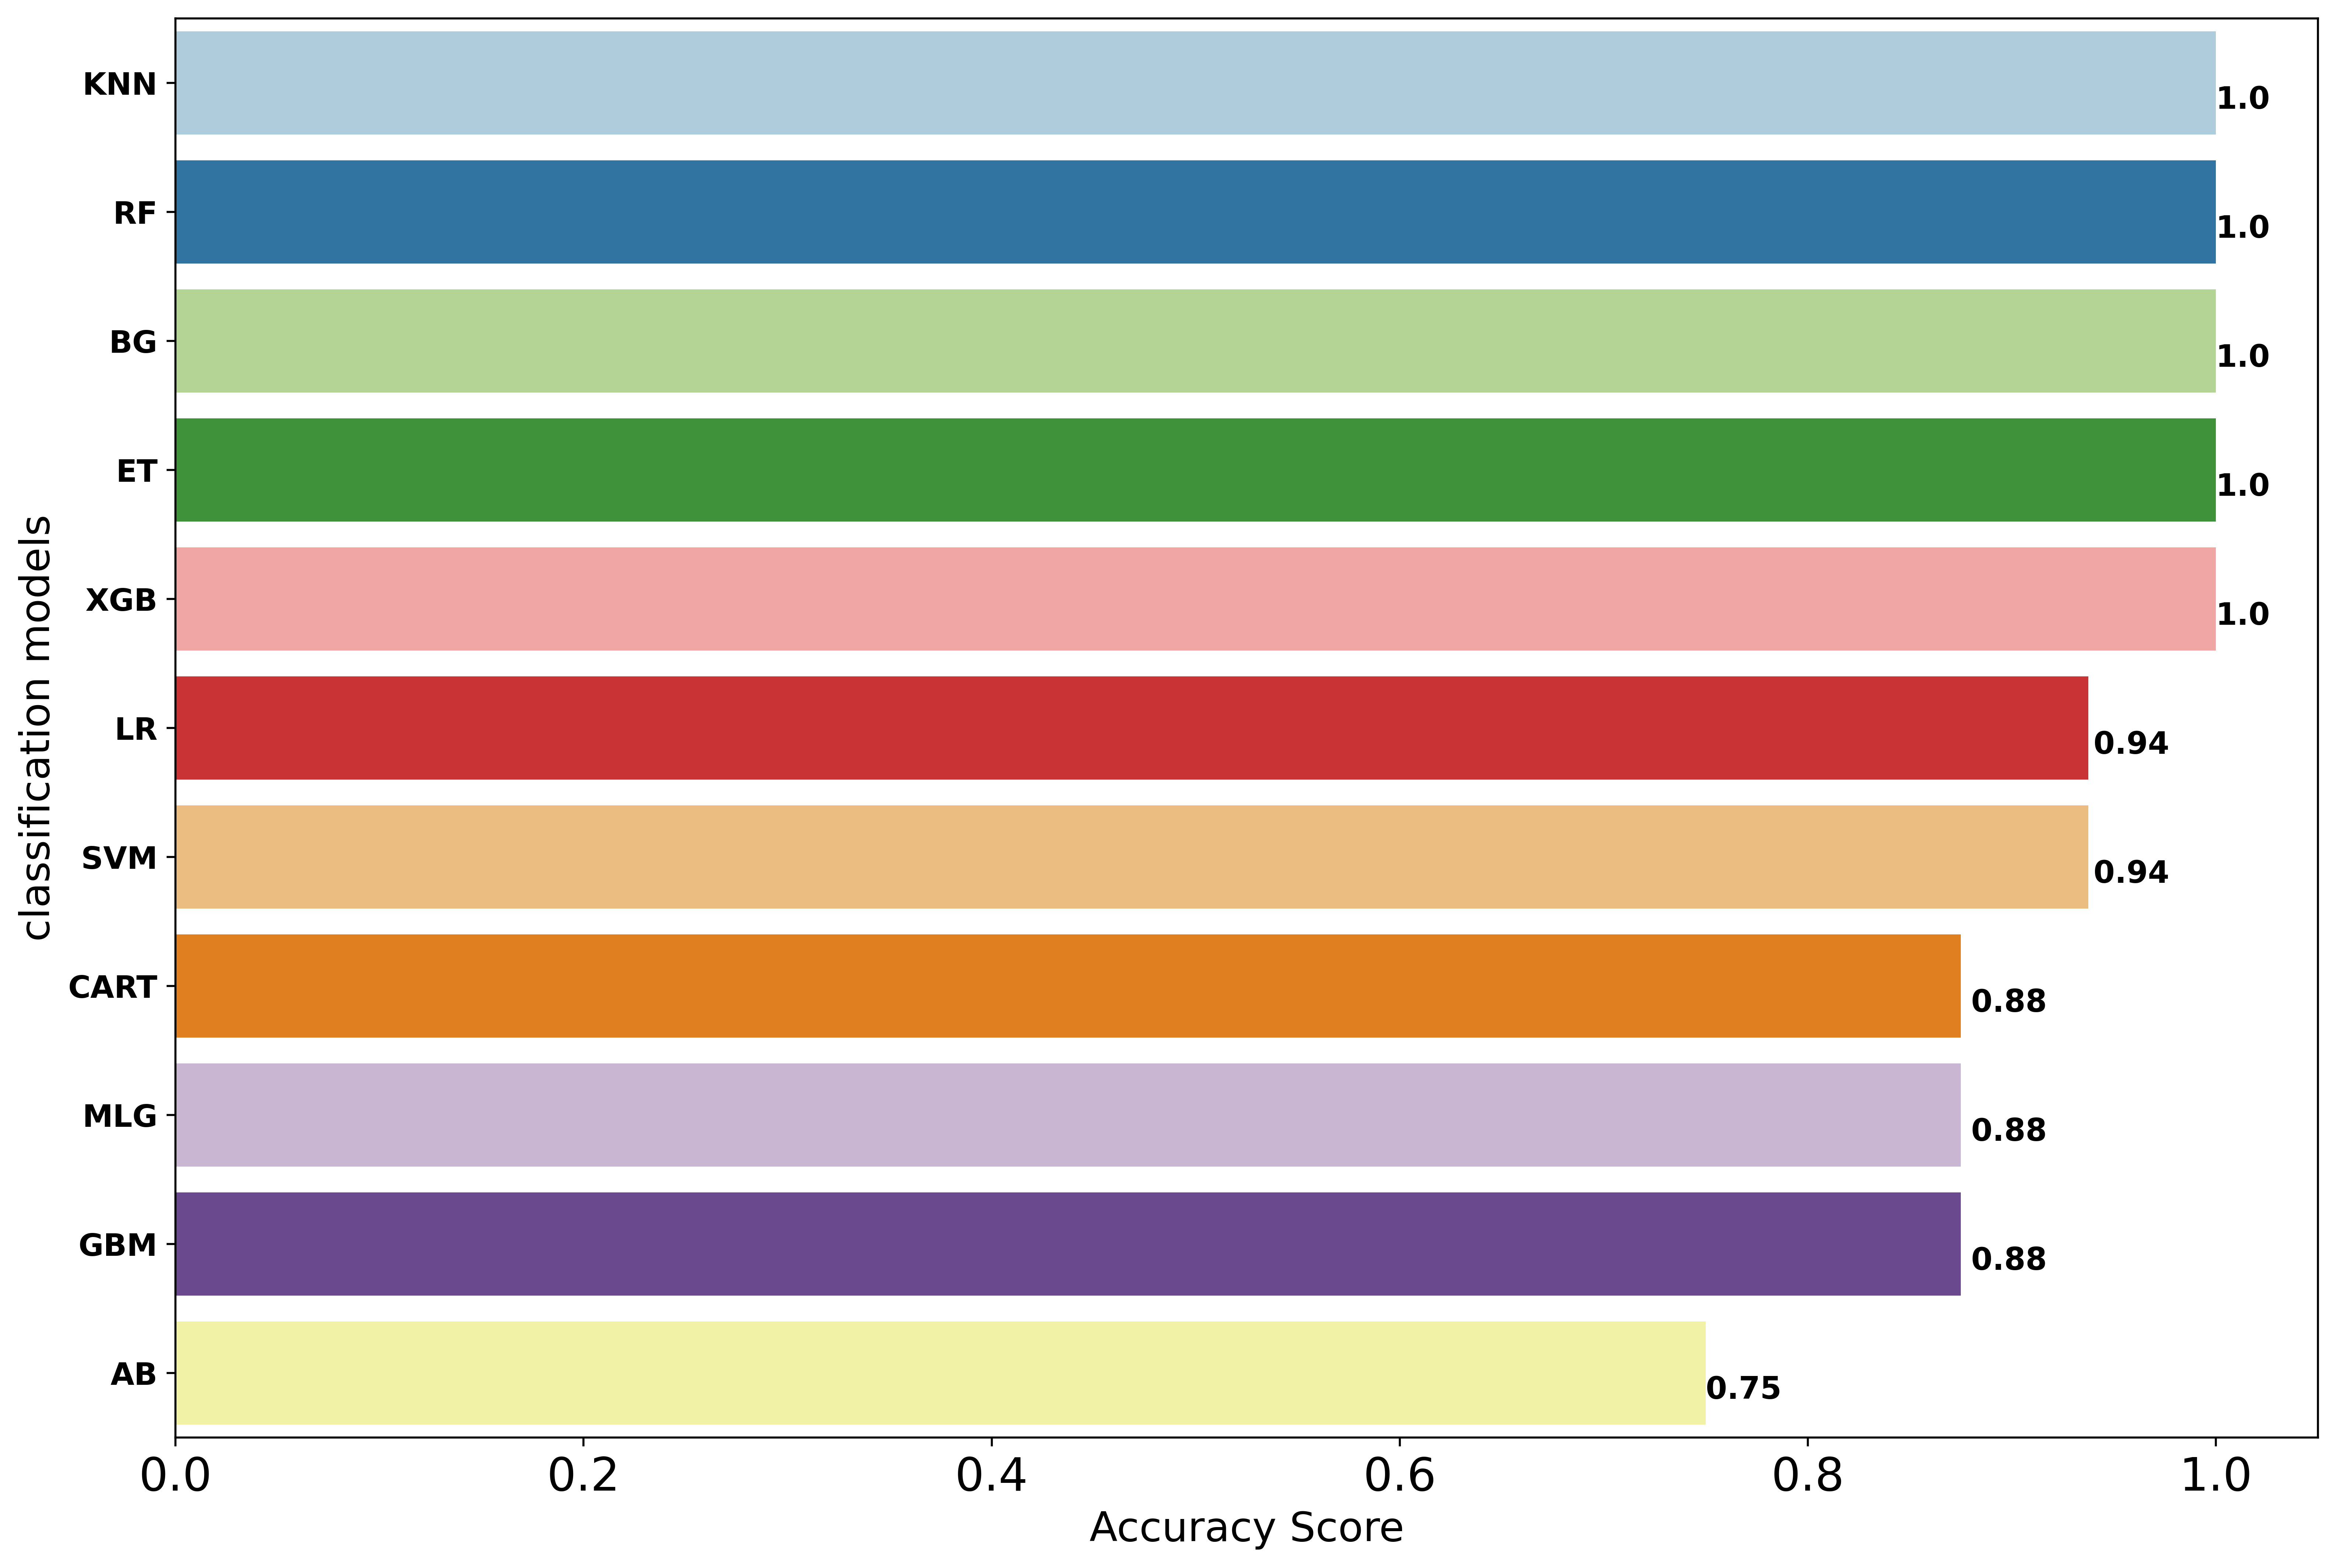

In [101]:
#plotting the evaluation table
f,axe = plt.subplots(figsize=(15,10),dpi=500)
sn.barplot(x='Accuracy', y='Classifier', data=table_eval, ax = axe,palette='Paired')
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('classification models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table_eval.Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()

## Model Evaluation and Predictions With optimal algorithms

- Random Forest

In [102]:
#fitting our random forest model from chosen model
rf = RandomForestClassifier()
rand_model = rf.fit(X_train,y_train)
preds_rand = rand_model.predict(X_test)
preds_rand

array([3, 1, 3, ..., 2, 2, 3])

In [103]:
cn_rand = confusion_matrix(y_test,preds_rand)

Text(50.722222222222214, 0.5, 'absolute')

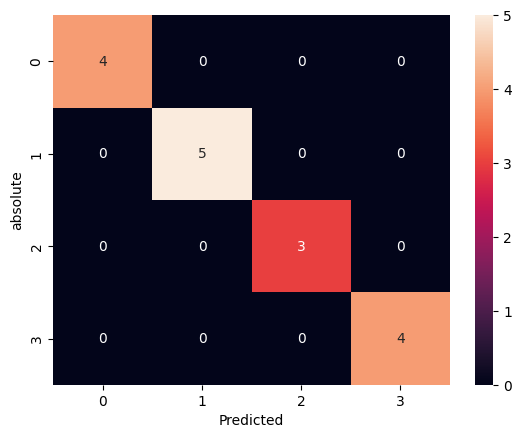

In [104]:
#confusion matrix for test data 
sn.heatmap(cn_rand,annot=True)
plt.xlabel("Predicted")
plt.ylabel("absolute")

In [105]:
#printing our training and testing score on our model 
train_score_rand = rand_model.score(X_train, y_train)
test_score_rand = rand_model.score(X_test,y_test)
print("Training score: {:.2f}".format(train_score_rand))
print("Testing score: {:.2f}".format(test_score_rand))

Training score: 1.00
Testing score: 1.00


- KNN ALgorithm

In [106]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
preds_knn = knn_model.predict(X_test)
preds_knn

array([3, 1, 3, ..., 2, 2, 3])

In [107]:
cn_knn = confusion_matrix(y_test,preds_rand)

Text(50.722222222222214, 0.5, 'absolute')

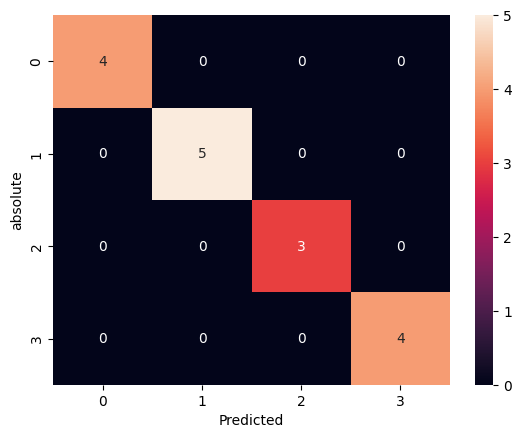

In [108]:
#confusion matrix for test data 
sn.heatmap(cn_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("absolute")

In [109]:
#printing our training and testing score on our model 
train_score_knn = knn_model.score(X_train, y_train)
test_score_knn = knn_model.score(X_test,y_test)
print("Training score: {:.2f}".format(train_score_knn))
print("Testing score: {:.2f}".format(test_score_knn))

Training score: 0.95
Testing score: 1.00


 - XG Boost

In [110]:
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)
preds_xgb = xgb_model.predict(X_test)
preds_xgb

array([3, 1, 3, ..., 2, 2, 3], dtype=int64)

In [111]:
cn_xgb = confusion_matrix(y_test,preds_xgb)

Text(50.722222222222214, 0.5, 'absolute')

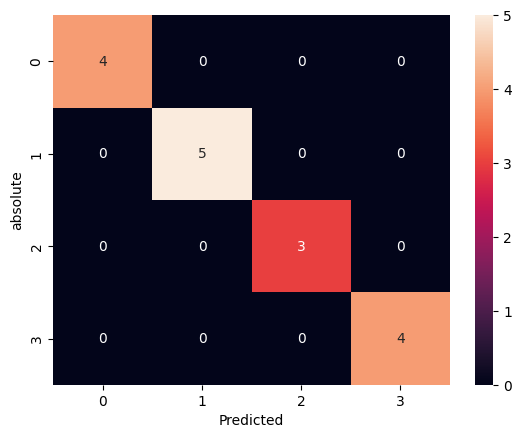

In [112]:
#confusion matrix for test data 
sn.heatmap(cn_xgb,annot=True)
plt.xlabel("Predicted")
plt.ylabel("absolute")

In [113]:
#printing our training and testing score on our model 
train_score_xgb = xgb_model.score(X_train, y_train)
test_score_xgb = xgb_model.score(X_test,y_test)
print("Training score: {:.2f}".format(train_score_xgb))
print("Testing score: {:.2f}".format(test_score_xgb))

Training score: 1.00
Testing score: 1.00


## Conclusion
- After observation of report with all classification models and ensemble techniques we observed the best accuracy with random forest as our training and test data is niether overfitting or underfitting and also with the confusion matrix we observe that the misclassification is lesser

## Saving our model  and vector for  Predictions

In [114]:
# saving our model 
filename = 'final_model.sav'
pickle.dump(rand_model,open(filename,'wb'))

In [115]:
# fitting our model 
loaded_model = pickle.load(open(filename,'rb'))

In [116]:
#saving our vector file
filename_vec = 'tfidf_vec.sav'
pickle.dump(word_vec,open(filename_vec,'wb'))

In [117]:
loaded_vect = pickle.load(open(filename_vec,'rb'))

In [118]:
#saving our csv file 
resume_df3.to_csv("final_resume_data.csv")

In [119]:
# predicting using the model
final_preds = loaded_model.predict(word_feat)

In [120]:
#transforming our predictions
category = le.inverse_transform(final_preds)

In [121]:
category = pd.DataFrame(category)

In [122]:
resume_df3['predicted_category'] = category
resume_df3.head()

category  \
0         1   
1         1   
2         1   
3         1   
4         1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   filtered_resume  \
0  name ravali p curriculum vitae specialization be computer science and engg career objective career objective to utilize my technical skill for achieving the target and developing the best performance in organization. education education degree course college institute university board percentage cgpa year of passing cgpacgpa be s j b institute of technology vtu 6.5 cgpa 2021 diploma aryabharathi polytechnic karnataka state board of technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 52.8 2011 manual testing skill strong knowledge in sdlc concepts. extensive knowledge in white box testing. good knowledge in functional testing integration testing extreme knowledge on system testing good knowledge in adhoc testing reliability testing. ...   
1  susovan bag seeking a challenging position in the field of science and technology to utilize my skill for organization and individual growth and to enhance my knowledge from my academic learning to give my best to the organization. skill ccna routing switching subnetting programming c c java html cs sql oops algorithm data structure dbms networking o linux linux system administration with troubleshooting soft skill leadership collaboration good communication and customer handling skills. language english fluent hindi fluent bengali native telugu project smart agriculture built a product for farmer using iot a a solution automatic water motor controller 2019 2020 iot android and api technology combined to automate work of water motor controller using sensors. bookstore management interf...   
2  kanumuru deepak reddy career objective to secure a position in a reputed organization where i can efficiently contribute my knowledge and skill to the growth of the organization and build my professional career.academic qualification qualificationinstituteboard or universityyear of completionpercentage cgpab.tech e.c.e audisankara college of engineering technology gudur.jntu anantapur.201877.3intermediatenarayana junior college naidupet.board ofintermediate ap.201489.5sscnavodaya high school naidupetboard of secondary education ap.20126.7project title density based traffic control system using arduino.duration 4 months.description traffic congestion is a severe problem in most of the city across the world and it ha become a nightmare for the citizens. it is caused by delay in signal in...   
3  haripriya battina experience a ui developer in reactjs javascript. phone 91 9908576950 gmail haripriyabattini gmai.com location visakhapatnam job objective looking for a challenging role to put my experience in various aspect of technology with an objective to be a leading source of information and guidance concerning thtechnological requirements. want to be a part of a reputed organization that allows me to effectively use my technical skill in the real world for overall growth of organization and my professional career. work experience education 1. associate ui developr company blue yonder hyderabad. work done on copernicus project. the main moto of this project is it is gtm

## Creating predictive system

In [123]:
#copying all the text from the resume and cleaning using a function 
text_input ="""Hari Krishna M


Summary:
A result oriented professional with 6.10 yrs. of experience in Software Engineering with 3.10 yrs. of relevant experience in Workday Consultant.
Exceptional ability in understanding the business needs and improving the process.
Excellent communication skills and proven experience in working independently as well as in a team.
Involved in preparing business requirement documents and analysis of client functional requirements.
Extensive knowledge on Complete Tenant configurations – (Supervisory Organizations, Roles, Compensation, Business Processes)
Configuration of Supervisory Organizations, Job Profiles & Positions, Compensation (salary plans based on different grades, grade profiles and allowances), Security and Business Processes.
Day to day support of Workday HCM, Security, Compensation, reporting issues and implementing enhancements when needed.
Created Custom Reports and scheduled reports as requested by end-users.
Worked on modifying/troubleshooting/enhancing existing custom reports using Calculated Fields.
Created and used calculated fields in reporting, business processes, and integrations within Workday. 
Experience in performing HCM tasks like defining Job Profiles, position creations, employee hiring, transfers, promotions, demotions and terminations etc., as part of Workday Testing requirements.
Understanding and careful analysis of the Internal HR team requirements.
Setting up the Email notifications and Business Process configurations.
Excellent object management skills in Workday like configuring Supervisory/Matrix Organizations (Divide organizations, Inactivate Organizations, create subordinates).
Extensive knowledge on other HCM Org structures like Custom Organizations and Service Center Organizations.
Experience in creating Job Profiles, Job Families and Job Family Groups, also worked with the creation and maintenance of position and job staffing models.
Experienced in WORKDAY security related to creating and assigning Users / Roles Permissions.
Involved in Workday HCM for various HR modules such as Compensation, Time Tracking, Security and Absence Management.
Excellent interpersonal skills with a strong desire to achieve specified goals. 
Support the team with product backlog grooming activities
A valuable team player with capability to share the team vision and achieve goals and deadlines
Work Experience:
Working as Workday Consultant at CTS from Mar- 2019 To till date (Parent Company- Riosoft Technologies)
Worked as Workday Developer for TCS from Aug- 2014 To Feb 2019

Education:
MCA from JNTU University, Kakinada in 2013.

Technical Skills:
ERP Systems	Workday, PeopleSoft
Workday Modules	Core HCM, Compensation, Benefits and Absence management.
Workday Skills	Integrations-EIB, Studio, Reports, Calculated Fields, Business Processes, Dashboards.
Database Technologies	Oracle 10g,11i
Operating Systems	MS-DOS, Windows XP/ 7, Windows Server 2008, UNIX

Professional Background:
Project#1
NCR – Workday Implementation/Enhancements					                                            Mar 2019 –Till Date
NCR Corporation                                                                                      Mar 2019 -Till Date
Description:
The NCR Corporation (formerly National Cash Register) is US-Based computer hardware, software and Electronics Company that provides products and services that enable businesses to connect interact and transact with their customers. Its main products are self-service kiosks, point-of-sale terminals, automated teller machines, check processing systems, barcode scanners, and business consumables. They also provide IT maintenance support services.

Roles &Responsibilities
Understanding and analyzing the Business Requirements by studying the Functional Documents.
Responsible for data migration from legacy system to workday using EIB.
Worked with workday studio to fix integration related issues.
Built many Enterprise interface builders (EIB’s) on inbound and core connector worker and benefits On outbound’s
Create the new workday studio programs to sending AI-Statement to worker documents using BIRT layout.
Creating the custom reports as per the client requirement and preparing the UTP documents.
Created Workday Studio inbound studio programs to load compensation information from ADP to workday.
Hands-on experience In Migrating the XSLT Code, Reports from Lower tenet to Sandbox and Production using Object Transporter. 
Created EIB Inbound Integrations for loading the employees personal Information like, Emergency contacts, Compensation, One-time payments, Bank account information, cost center information.
Created EIB outbound Integrations, written XSLT code and sending data from workday to downstream systems.
Hands-on experience in creating the calculated fields using different functions for complete logics. 
Supporting the Different teams in UAT phase as well as with test factory teams during integration testing phase.
Involved in calls with client and update the work status as well as clarifications if any.
Environment: Workday HCM, Workday Studio, XML, Web Services, XSLT 2.0, Report Writer.



Project#2:
TCS					                                                                          Aug 2017 – Feb 2019
Toyota				
Description:
Toyota Motor Corporation, usually shortened to Toyota, is a Japanese multinational automotive manufacturer headquartered in Toyota, Aichi, Japan. In 2017, Toyota's corporate structure consisted of 364,445 employees worldwide and, as of September 2018, was the sixth-largest company in the world by revenue. As of 2017, Toyota is the world's second-largest automotive manufacturer. Toyota was the world's first automobile manufacturer to produce more than 10 million vehicles per year which it has done since 2012, when it also reported the production of its 200-millionth vehicle. As of July 2014, Toyota was the largest listed company in Japan by revenue.
Roles &Responsibilities:
Experienced to work with Workday Report Writer and creating custom integrations with third party applications using Workday Core Connector and Enterprise Interface Builder (EIB).
Knowledge of Domain, Role and User based security.
Using sequence generators, generating templates and validating inbound integration system results.
Created new integration to pull the new hires information using Core Connector Worker and Document Transformation which uses connector integrations XML Output as its data source input.
Creating the new business processes and notifications in deployment and sandbox tenants based on the designed business flow diagrams.
Developed Several Complex Integrations using Workday Studio and EIB.
Created test data and executed Test cases for System testing. Created test scenarios and test cases and coordinated the testing effort with all the stakeholders for System and UAT.
Day to day support of Workday HCM, Security, Payroll, Benefits, Compensation and Reporting issues
Involved in the design phase and prototyping for further discussions with the client.
Experienced to work with Workday Report Writer and BIRT tool and creating custom integrations with third party applications using Workday Cloud Connect and Enterprise Interface Builder (EIB).
Created and used calculated fields in reporting, business processes, integrations and other areas within Workday.
Environment: Workday HCM, Core Connecters, Absent management, Workday Studio, XML, XSLT, Xpath, Oxygen XML.

Project#3
Catamaran, Schaumburg, IL USA
Catamaran Rx			                                                                            Aug 2014 –Jul 2017	
Roles&Responsibilities:
Lead day-to-day operations of the PeopleSoft Technical teams (including Off-Shore) with business assignments, technical development, support, and issue resolution
Technical Lead for FY14 Compensation, Pharma Spin-off from PeopleSoft HCM system, eV3 applicant conversion into PeopleSoft and Resume Parsing integration with PeopleSoft
Ensure project team follows methodology selected for projects and produces quality deliverables
Participated in the design effort by assisting in the development of design specifications applying business expertise and best business practices.
Highly experienced with PeopleSoft Manager Self Service & Employee Self Service applications

Environment:PeopleSoft HCM 9.1, People Tools 8.51, Oracle 11i"""

text_input = process_resume(text_input)
#text_input = remove_short_words(text_input)
text_input = remove_emoji(text_input)
text_input=  word_tokenize(text_input)
#removing stopwords from corpus 
my_stop_words=stopwords.words('english')
text_input=[word for word in text_input if not word in my_stop_words]
nlp=spacy.load('en_core_web_sm')
text_input=nlp(' '.join(text_input))
text_input=[token.lemma_ for token in text_input]
text_input=' '.join(text_input)
text_input[:2000]

'hari krishna msummary result orient professional 6.10 yrs . experience software engineering 3.10 yrs . relevant experience workday consultant.exceptional ability understand business need improve process.excellent communication skill prove experience work independently well team.involved prepare business requirement document analysis client functional requirements.extensive knowledge complete tenant configuration supervisory organization role compensation business process configuration supervisory organization job profile position compensation salary plan base different grade grade profile allowance security business processes.day day support ofworkdayhcm security compensation report issue implement enhancement needed.created custom report schedule report request end users.worked modifying troubleshooting enhance exist custom report use calculate fields.create use calculate field report business process integration withinworkday.experience perform hcm task like define job profile posit

In [124]:
#transforming the given resume to vectors 
input_feat = loaded_vect.transform([text_input])

In [125]:
#predicting the resume for the category
prediction_id = loaded_model.predict(input_feat)[0]

In [126]:
#mapping resumes to given categories
category_mapping = {
    0 : 'peoplesoft develeopers',
    1 : 'React develeopers',
    2 : 'Sql develeopers',
    3 : 'Workday resumes'
}

In [127]:
#adding the labels to the categories
category_name = category_mapping.get(prediction_id,"unknown")

In [128]:
#printing out the given category
print(category_name)

Workday resumes


In [129]:
#extracting name from the given resume 
# from spacy.matcher import Matcher

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)

def extract_name(resume_text):
    nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
    matcher.add('NAME', [pattern], on_match = None)
    
    matches = matcher(nlp_text)
    
    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text
    
    
name = extract_name(text_input)
print(name)


hari krishna


In [130]:
#extracting skills from the corpus 
nlp = spacy.load('en_core_web_sm')
def extract_skills(resume_text):
    nlp_text = nlp(resume_text)
 # removing stop words and implementing word tokenization
    tokens = [token.text for token in nlp_text if not token.is_stop]
    skills = ['workday', 'hcm', 'eib', 'picof','workday hcm',
              'workday studio','nnbound/outbound integrations',
              'peoplesoft', 'pia','ccb','birt','peci','ccw','pum','people tools',
              'peoplesoft implementation','peoplesoft components',
              'peoplesoft dba','peoplesoft admin','peoplesoft admin/dba','peopleSoft fscm', 
              'peopletoolsupgrade','peopletools upgrade','process scheduler servers',
              'peoplesoft hrms','peopleSoft consultant','peopledoft cloud',
              'PeopleSoft migrations','peoplesoft Testing Framework','pure internet architecture',
              'sql','sql server', 'ms sql server','msbi', 'sql developer', 'ssis','ssrs',
              'ssms','t-sql','tsql','Razorsql', 'razor sql','triggers','powerbi','power bi',
              'oracle sql', 'pl/sql', 'pl\sql','oracle', 'oracle 11g','oledb','cte','ddl',
              'dml','etl','mariadb','maria db','reactjs', 'react js', 'react js developer', 'html', 
              'css3','xml','javascript','html5','boostrap','jquery', 'redux','php', 'node js',
              'nodejs','apache','netbeans','nestjs','nest js','react developer','react hooks',
              'jenkins','rdbms','core connectors','PICOF','workday web services']

    skillset = []
    
    # check for uni-grams 
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)
    
    # check for bi-grams and tri-grams 
    for token in nlp_text.noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

skills = []
skills = extract_skills(text_input)

print(skills)

['Workday', 'Birt', 'Xml', 'Eib', 'Peoplesoft', 'Oracle', 'Hcm']


In [131]:
# Instantiating the model and tokenizer 
# my_model = TFT5ForConditionalGeneration.from_pretrained('t5-small')
#tokenizer = T5Tokenizer.from_pretrained('t5-small')
    

In [132]:
# Concatenating the word "summarize:" to raw text
#text = "summarize: " + resume_text
#input_ids = tokenizer.encode(text, return_tensors='pt', max_length=512, truncation=True)

In [133]:
# encoding the input text
#input_ids=tokenizer.encode(text, return_tensors='pt', max_length=100)

In [134]:
# Generating summary ids
#summary_ids = my_model.generate(input_ids, max_length=max_length, num_beams=4, no_repeat_ngram_size=2)
#t5_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [135]:
# Decoding the tensor and printing the summary.
#t5_summary = tokenizer.decode(summary_ids[0])
#print(t5_summary)

In [136]:
#defining the function for resume summarization
def extract_resume_summary(resume_text, max_length=50):
    my_model = TFT5ForConditionalGeneration.from_pretrained('t5-small')
    tokenizer = T5Tokenizer.from_pretrained('t5-small')
    
    text = "summarize: " + resume_text
    input_ids = tokenizer.encode(text, return_tensors='pt', max_length=512, truncation=True)
    
    summary_ids = my_model.generate(input_ids, max_length=max_length, num_beams=4, no_repeat_ngram_size=2)
    t5_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
    return t5_summary

resume = text_input
summary = extract_resume_summary(resume, max_length=50)  # Adjust the max_length value as needed
print(summary)

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


experience software engineering 3.10 yrs relevant experience workday consultant.exceptional ability understand business need improve process. extensive knowledge complete tenant configuration supervisory organization job profile position compensation salary plan base different grade grade profile allowance security


In [137]:
#extracting keywords using keybert
model = KeyBERT(model="distilbert-base-nli-mean-tokens")

In [138]:
#checking the keywords with keybert and cosine similiarity
#%%time
#model.extract_keywords(
    #text_input,
    #top_n=10,
    #keyphrase_ngram_range=(1, 3),
    #stop_words="english",
    #use_maxsum=True,
#)

In [139]:
#defining function extracting keywords using keybert
def extract_keywords(resume):
    keywords_scores = model.extract_keywords(
    resume,
    top_n=10,
    keyphrase_ngram_range=(1, 3),
    use_maxsum = True,
    stop_words="english",)
    keywords = [keyword for keyword, _ in keywords_scores]
    return keywords

In [140]:
keywords = extract_keywords(text_input)
keywords

['erp workday peoplesoftworkday',
 'workday cloud connect',
 'migration legacy workday',
 'management workday skill',
 'workday studio xml',
 'management workday studio',
 'workday consultant cts',
 'experience workday consultant',
 'workday studio fix',
 'workday implementation enhancement']

In [141]:
#extracting resume match using cosine similiarties
def get_resume_score(text):
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(text)
    #Print the similarity scores
    print("\nSimilarity Scores:")
     
    #get the match percentage
    matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
    matchPercentage = round(matchPercentage, 2)# round to two decimal
    return matchPercentage  

In [142]:
  job_description = """  
Serve as a subject matter expert on Workday system initiatives, including managing integrations, Core HCM, Benefits, Absence, Time Tracking, and Security.
Design and build both inbound/outbound integrations using Core Connector, RAAS, Report Designer, XML, XSLT, and SOAP web services.
Primary point of contact for data gathering, testing, and communication with key stakeholders and internal Business Technology teams.
Build reports to support Payroll, Benefits, Compensation and other areas of the Workday product.
Analyze the effectiveness of current technology solutions and keep stakeholders informed of project progress by preparing and reviewing status reports to ensure on-time delivery of solutions.
Develop business case for new products, improvements to existing products and business ventures.
Research issues and use independent analysis and judgment to produce solution options (including alternative solutions when necessary to address system limitations)
Partners with cross-functional teams to prepare for integrations, migrations, EIB uploads, and upgrades.
Stay up to date on system updates and provide recommendations on adoption of new functionalities 
 
  """

In [143]:
corpus = [text_input, job_description] 

In [144]:
score = get_resume_score(corpus)
score


Similarity Scores:


31.25

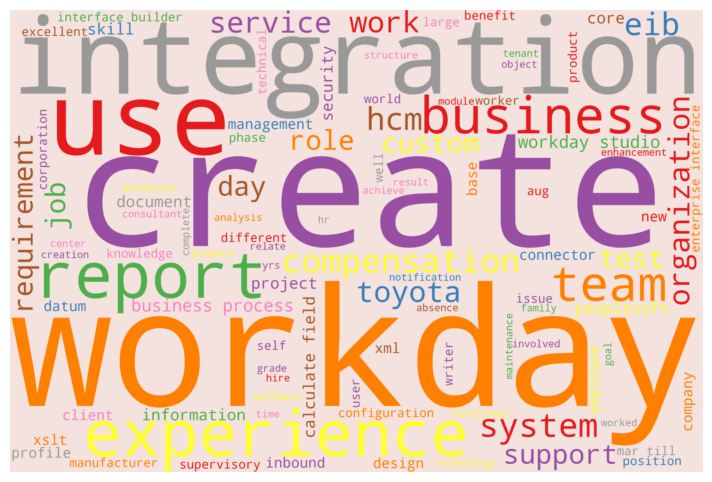

In [145]:
#creating word cloud with given resume
text = text_input
wordcloud = WordCloud(width=3000, height=2000, background_color='#F4E2DE', max_words=100, colormap='Set1', contour_color='black', contour_width=2).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [146]:
#extarcting experience details
def expDetails(text):
    text = text.lower()
    text = text.split()

    for i in range(len(text) - 2):
        if text[i] == 'yrs' or text[i] == 'years':
            exp_text = ' '.join(text[i - 2: i + 3])
            matches = re.findall(r'\d+\.?\d*', exp_text)
            if len(matches) > 0:
                experience = float(matches[0])
                if 'month' in exp_text:
                    return experience
                else:
                    return experience * 12

    return None

In [147]:
#printing experience details 
experience = expDetails(text_input)
print("years of experience :",str(round(experience)) + " Months ")

years of experience : 73 Months 


In [148]:
#extracting education details from the resume
nlp = spacy.load('en_core_web_sm')

def parse_resume(resume_text):
    doc = nlp(resume_text)

    # Initialize variables to store education information
    education = []

    # Define education keywords
    education_keywords = ['education', 'qualifications', 'academic background','university']

    # Iterate over each sentence in the resume
    for sent in doc.sents:
        lower_sent = sent.text.lower()

        # Check if the sentence contains any education keywords
        if any(keyword in lower_sent for keyword in education_keywords):
            # Extract the entities in the sentence
            for ent in sent.ents:
                # Check if the entity label is related to education
                if ent.label_ in ['ORG', 'NORP']:
                    education.append(ent.text)

    return education


In [149]:
education = parse_resume(text_input)
print("educated from :",education)

educated from : ['mca jntu university']


In [150]:
#deployment dataframe table
skills_str = ", ".join(skills)
keywords_str = ", ".join(keywords)
education_str = ", ".join(education)
data = {
    "Name":[name],
    "Category":[category_name],
    "Education":[education_str],
    "Skills":[skills_str],
    "Summary":[summary],
    "Experience":[str(round(experience))+ " Months "],
    "Keywords":[keywords_str],
    "Resume Match": [str(score) + " % "]    
}


In [151]:
#fitting our dataframe 
df_output = pd.DataFrame(data)

In [152]:
#reading output 
df_output

Name         Category            Education  \
0  hari krishna  Workday resumes  mca jntu university   

                                             Skills  \
0  Workday, Birt, Xml, Eib, Peoplesoft, Oracle, Hcm   

                                                                                                                                                                                                                                                                                                                        Summary  \
0  experience software engineering 3.10 yrs relevant experience workday consultant.exceptional ability understand business need improve process. extensive knowledge complete tenant configuration supervisory organization job profile position compensation salary plan base different grade grade profile allowance security   

   Experience  \
0  73 Months    

                                                                                                                                                                                                                                                                 Keywords  \
0  erp workday peoplesoftworkday, workday cloud connect, migration legacy workday, management workday skill, workday studio xml, management workday studio, workday consultant cts, experience workday consultant, workday studio fix, workday implementation enhancement   

  Resume Match  
0     31.25 %

In [153]:
#printing out all extracted insights 
print("SKILLS:", skills)
print("NAME:", name)
print("CATEGORY:", category_name)
print("SUMMARY:", summary)
print("KEYWORDS:", keywords)
print("Your resume matches about " + str(score) + "% of the job description.")
print("years of experience :",str(round(experience)) + " Months ")
print("educated from :",education)

SKILLS: ['Workday', 'Birt', 'Xml', 'Eib', 'Peoplesoft', 'Oracle', 'Hcm']
NAME: hari krishna
CATEGORY: Workday resumes
SUMMARY: experience software engineering 3.10 yrs relevant experience workday consultant.exceptional ability understand business need improve process. extensive knowledge complete tenant configuration supervisory organization job profile position compensation salary plan base different grade grade profile allowance security
KEYWORDS: ['erp workday peoplesoftworkday', 'workday cloud connect', 'migration legacy workday', 'management workday skill', 'workday studio xml', 'management workday studio', 'workday consultant cts', 'experience workday consultant', 'workday studio fix', 'workday implementation enhancement']
Your resume matches about 31.25% of the job description.
years of experience : 73 Months 
educated from : ['mca jntu university']


## Project Conclusion

- In this project we have worked on resume classification, we were given resumes of different categories.Our goal was to classify resumes according to their categories and extract information from the resume through screening.



- We have performed necessary data exploration, text preprocessing, text visualization,feature extraction using count vectorizer,bag of words and explored different entities in the text using Named Entity Recognition.



- Using the spacy library we have found the most common words occuring in the corpus,built worclouds for the whole corpus and particular category from the corpus, we observed the top 10 most occuring words in corpus constituting bigrams and trigrams.


- After complete pipeline of Data exploration we initiated model building by encoding our category labels using label encoder,after encoding we have converted our data into vectors using TFIDF Vectorizer creating a sparse matrix.




- we split our resume data into train and test data with ratio 80:20,80% as training set and 20% as test set,with this we are ready to train our model.



- After splitting the data we have performed model training with classification algorithms and ensemble techniques ,using metrics like KFOLD- validation, confusion Matrix, classification report and accuracy score, we append all our categories of algorithms all at once.



- After observing the confusion matrix and classification report we observed that Random Forest handled well by giving the least missclassification and a excellent equvivalent accuracy with training and testing validation.we got a good score of 1 for precision, recall, F1- score and accuracy.



- after perfoming the evaluation matrix with optimal algorithms with selecting our random forest as final model we performed our predictions on our test data and we got final predictions and classified resumes according to their categories by mapping according to encoded labels.



- after classifying resumes according to categories, we created a predictive system with resume parser techniques and extracted information from the input resume and fit in a dataframe.



- To conclude resume classification or resume screening is a technique to reduce the human effort in human resource management and extract resume with higher level accuracy,In this project we found out the importance of resume screening and how well an ATS system functions.
